# AI-Affordance Alignment 

## 1. Introduction

## 2. Theory

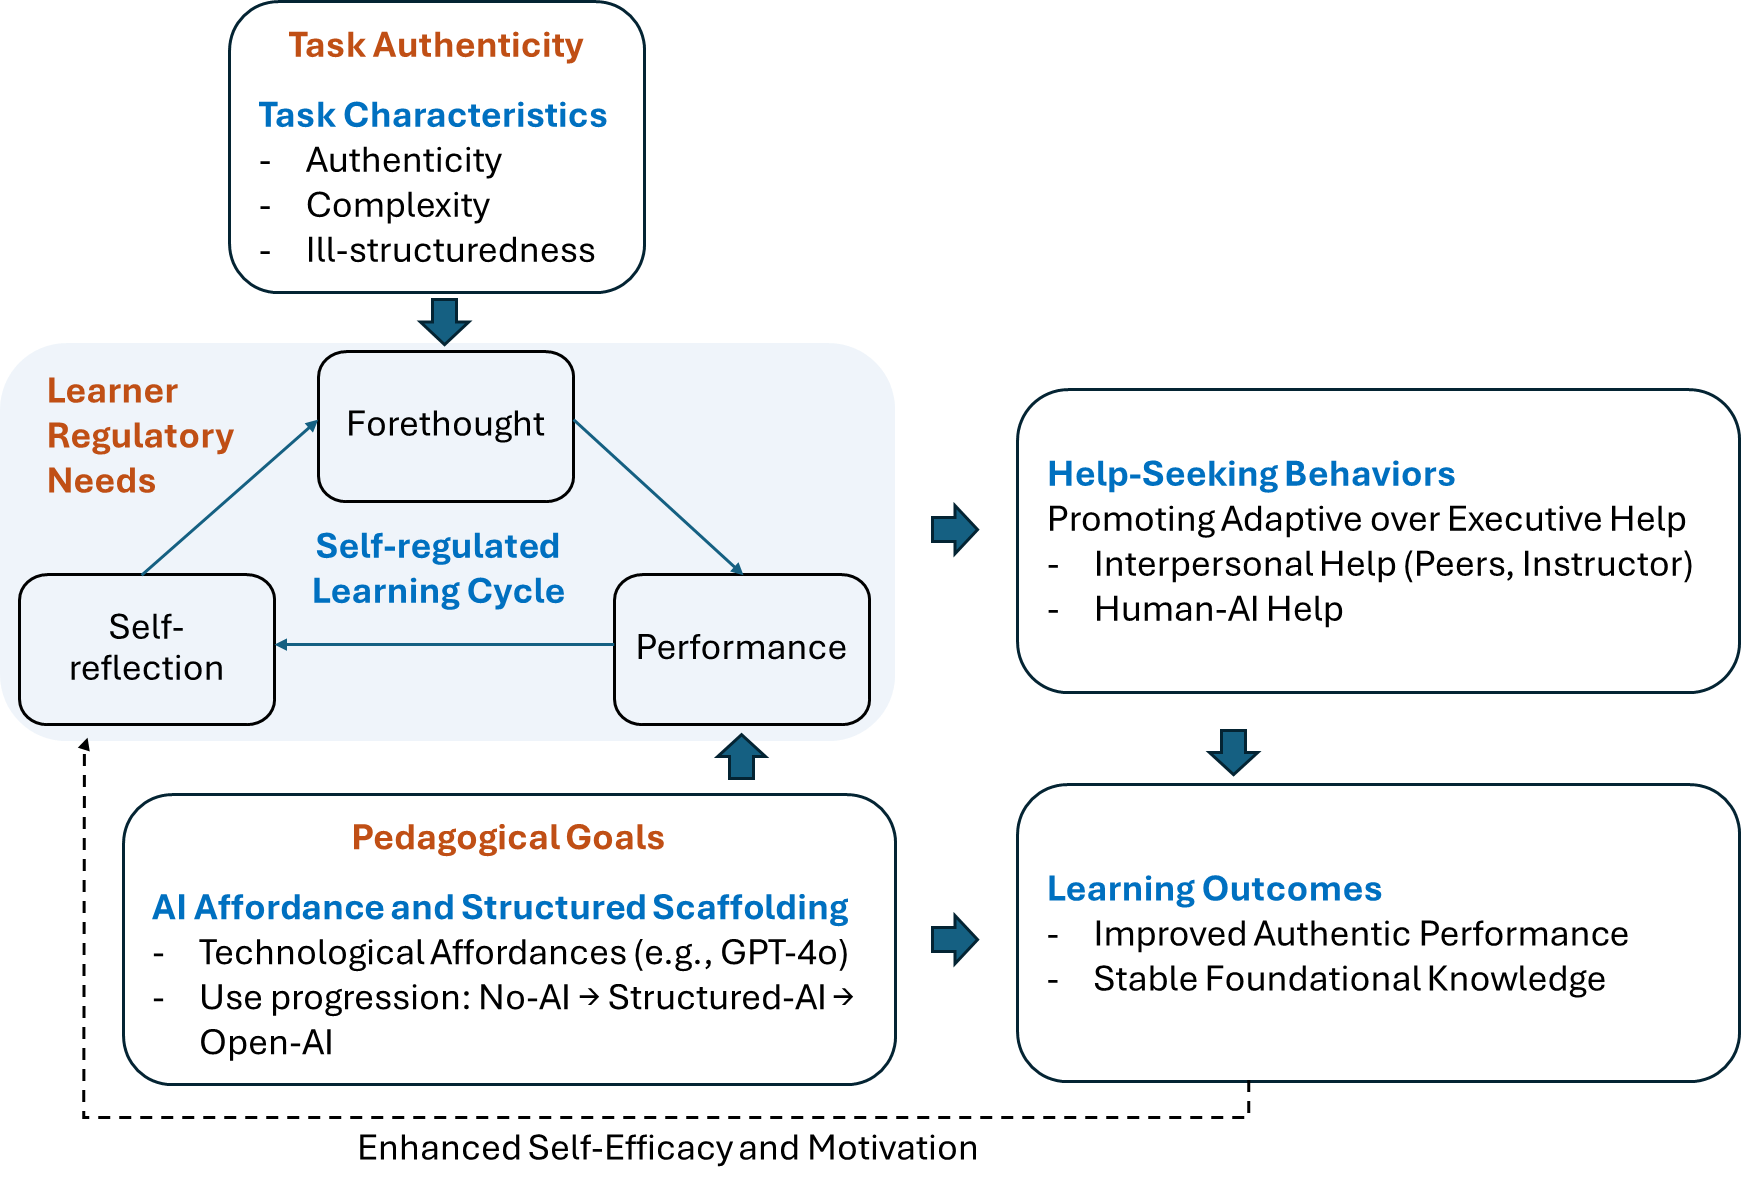

## 3. Method

### 3.3 Course participants and baseline equivalence

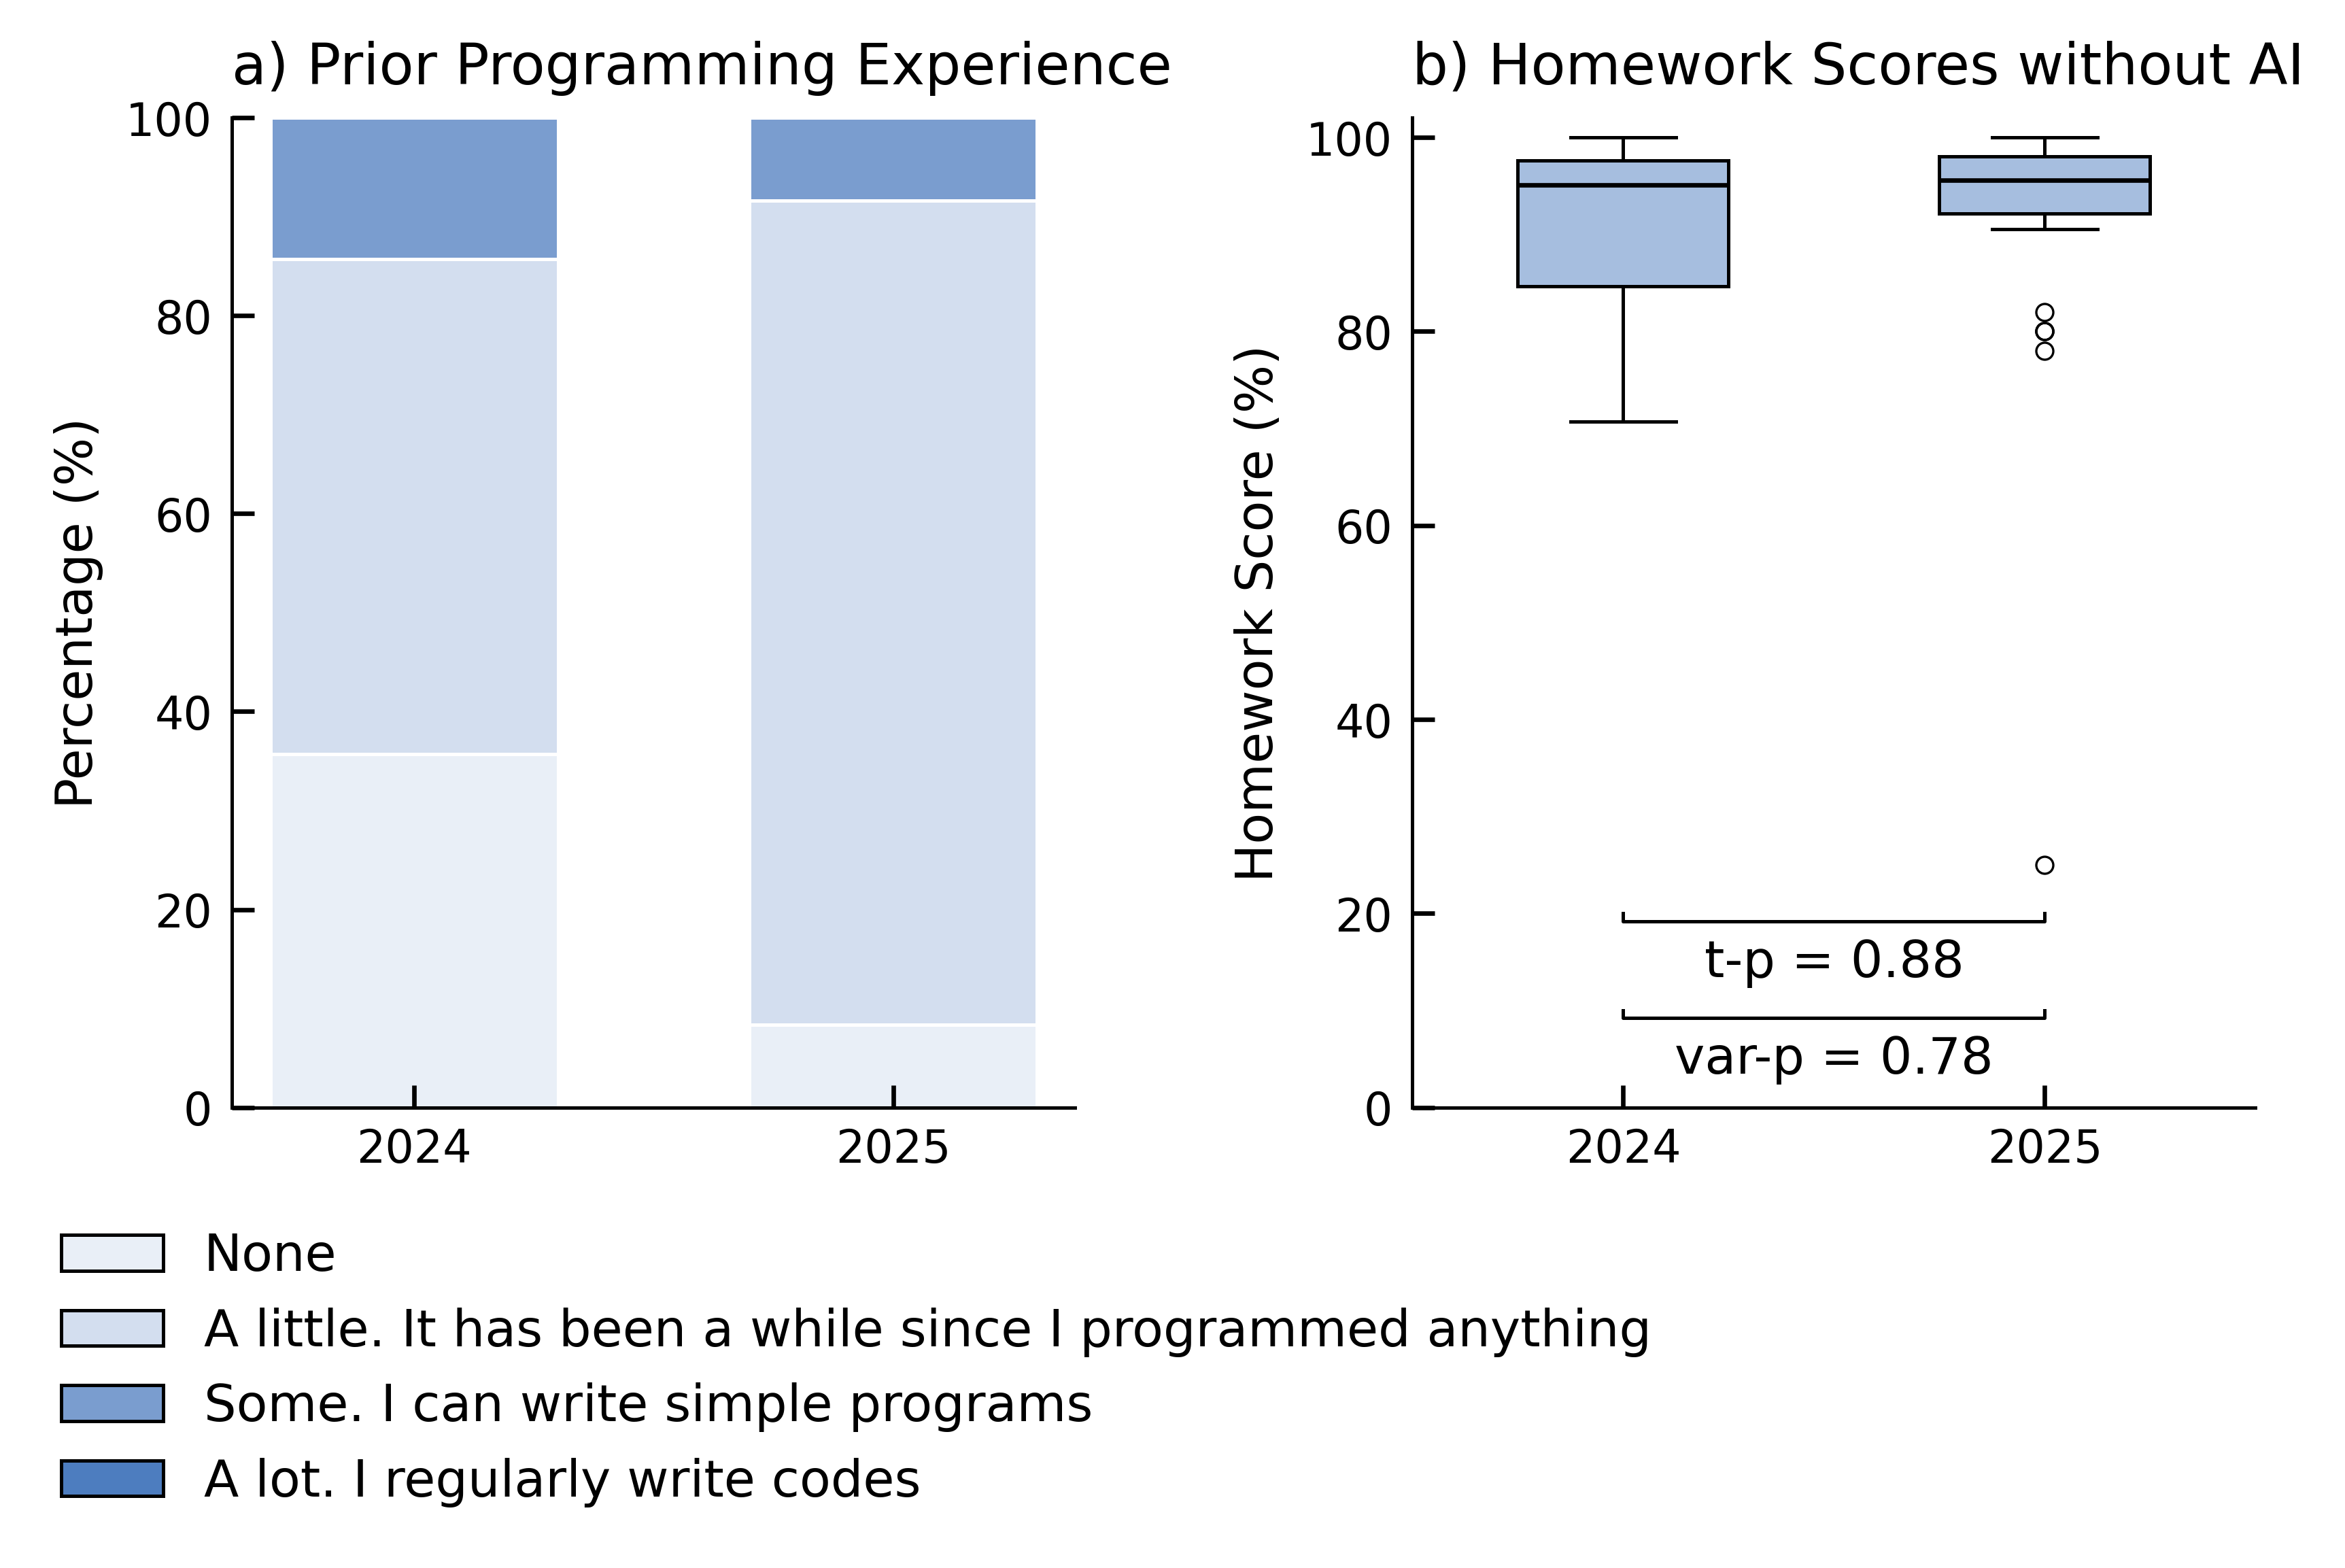

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from scipy.stats import ttest_ind, levene

# ─── 1) Matplotlib / ETH‐Blue styling ──────────────────────────────────────────
mpl.rcParams.update({
    "figure.dpi": 600,
    "savefig.dpi": 600,
    "font.family": "sans-serif",
    "axes.spines.top": False,
    "axes.spines.right": False,
    "axes.linewidth": 0.6,
    "xtick.direction": "in",
    "ytick.direction": "in",
    "xtick.major.size": 4,
    "ytick.major.size": 4,
    "xtick.labelsize": 8,
    "ytick.labelsize": 8,
    "axes.labelsize": 9,
    "axes.titlesize": 10,
})

# ─── 2) HARD‐CODED DATA ──────────────────────────────────────────────────────────
hw_data = """
81.1    93.9
70.7    100.0
97.6    100.0
95.1    78.0
95.1    96.3
97.6    95.1
83.5    98.8
        97.6
100.0   100.0
96.3    92.7
97.6    96.3
96.3    93.9
81      97.6
91      95.1
97.5    94
100     98
82      80
        93.5
80      98
88      80
94      90.5
98      96
91      99
98      80
        97
        82
        98
        25
"""

rows = []
for line in hw_data.strip().splitlines():
    parts = line.split()
    if len(parts) == 2:
        a = float(parts[0]); b = float(parts[1])
    elif len(parts) == 1:
        a = np.nan; b = float(parts[0])
    else:
        continue
    rows.append((a, b))

hw_2024 = [a for (a, b) in rows if not np.isnan(a)]
hw_2025 = [b for (a, b) in rows]

prog2024 = [
    "Some. I can write simple programs",
    "None",
    "A little. It has been a while since I programmed anything ",
    "None",
    "None",
    "A little. It has been a while since I programmed anything ",
    "A little. It has been a while since I programmed anything ",
    "A little. It has been a while since I programmed anything ",
    "None",
    "A little. It has been a while since I programmed anything ",
    "A little. It has been a while since I programmed anything ",
    "None",
    #"A lot. I regularly write codes",  Instructor response removed 
    "A little. It has been a while since I programmed anything ",
    "Some. I can write simple programs",
]

prog2025 = [
    #"A little. It has been a while since I programmed anything ", #dropped after first class
    "A little. It has been a while since I programmed anything ",
    "A little. It has been a while since I programmed anything ",
    "A little. It has been a while since I programmed anything ",
    "A little. It has been a while since I programmed anything ",
    #"A little. It has been a while since I programmed anything ", #dropped after first class
    "Some. I can write simple programs",
    #"None",  #Dropped during the semester
    "A little. It has been a while since I programmed anything ",
    "None",
    "A little. It has been a while since I programmed anything ",
    "A little. It has been a while since I programmed anything ",
    "A little. It has been a while since I programmed anything ",
    "A little. It has been a while since I programmed anything ",
    "A little. It has been a while since I programmed anything ",
]

categories = [
    "None",
    "A little. It has been a while since I programmed anything ",
    "Some. I can write simple programs",
    "A lot. I regularly write codes",
]

counts_2024 = [prog2024.count(cat) for cat in categories]
counts_2025 = [prog2025.count(cat) for cat in categories]

perc_2024 = [(c / len(prog2024)) * 100 for c in counts_2024]
perc_2025 = [(c / len(prog2025)) * 100 for c in counts_2025]

# ─── 3) CREATE 1×2 FIGURE ──────────────────────────────────────────────────────
fig, (ax1, ax2) = plt.subplots(
    nrows=1,
    ncols=2,
    figsize=(6.4, 3.15),  # ≈8 cm × 4 cm
    gridspec_kw={'wspace': 0.4}  # extra space between subplots
)

# ─── 3a) Left: Stacked‐bar of Programming Experience ─────────────────────────
x = np.array([0, 1])
width = 0.6

# "#E9EFF7" , #F8E8F3	  # 10%
# "#D3DEEF" , #EFD0E3	  # 20%
# "#A6BEDF" , #DC9EC9     # 40%
# "#7A9DCF" , #CA6CAE     # 60%
# "#648DC7"               # 70%
# "#4D7DBF" , #B73B92	  # 80%
# "#3C6EAF"               # 90%
# "#2A5E9E"               # 100%
# "#194F8E"               # 110%
# "#08407E" , #8C0A59	  # 120%

# ETH‐Blue shades for 
shades = ["#E9EFF7","#D3DEEF", "#7A9DCF", "#4D7DBF" ]

bottom24 = 0.0
bottom25 = 0.0

for idx, color in enumerate(shades):
    ax1.bar(
        0, perc_2024[idx], width,
        bottom=bottom24, color=color,
        edgecolor="white", linewidth=0.6
    )
    ax1.bar(
        1, perc_2025[idx], width,
        bottom=bottom25, color=color,
        edgecolor="white", linewidth=0.6
    )
    bottom24 += perc_2024[idx]
    bottom25 += perc_2025[idx]

ax1.set_xticks([0, 1])
ax1.set_xticklabels(["2024", "2025"])
ax1.set_ylabel("Percentage (%)")
ax1.set_ylim(0, 100)
ax1.set_title("a) Prior Programming Experience", loc="left", pad=6)

# Move legend outside the axes
handles = [
    plt.Rectangle((0, 0), 1, 1, facecolor=shades[i],
                  edgecolor="black", linewidth=0.6)
    for i in range(len(categories))
]
ax1.legend(
    handles, categories,
    bbox_to_anchor=(0.75, -0.45),
    loc="lower center",
    fontsize=9,
    frameon=False
)

# ─── 3b) Right: Single‐color Boxplot of Homework Scores ────────────────────────
BOX_COLOR = "#A6BEDF"  # ETH 40%
box_data = [hw_2024, hw_2025]

bp = ax2.boxplot(
    box_data,
    tick_labels=["2024", "2025"],
    patch_artist=True,
    widths=0.5,  # Set the desired width here
    medianprops=dict(color="black", linewidth=0.8),
    whiskerprops=dict(linewidth=0.6),
    capprops=dict(linewidth=0.6),
    flierprops=dict(marker="o", markersize=3, markeredgewidth=0.4),
)

for box in bp["boxes"]:
    box.set_facecolor(BOX_COLOR)
    box.set_edgecolor("black")
    box.set_linewidth(0.6)

# Compute p‐values
t_hw, p_hw = ttest_ind(hw_2025, hw_2024, equal_var=False)
l_hw_stat, l_hw_p = levene(hw_2024, hw_2025, center="median")

# Find the minimum y‐value to place annotations below
ymin_hw = min(min(hw_2024), min(hw_2025))
y_annot1 = ymin_hw - 5
y_annot2 = ymin_hw - 15

def annotate_p_below(ax, x1, x2, y, pval, label):
    ax.plot([x1, x1, x2, x2], [y, y - 0.8, y - 0.8, y], color="black", linewidth=0.6)
    ax.text((x1 + x2) / 2, y - 2.5, f"{label} = {pval:.2f}",
            ha="center", va="top", fontsize=9)

annotate_p_below(ax2, 1, 2, y_annot1, p_hw, "t-p")
annotate_p_below(ax2, 1, 2, y_annot2, l_hw_p, "var-p")

ax2.set_ylabel("Homework Score (%)")
ax2.set_ylim(0, 102)
ax2.set_title("b) Homework Scores without AI", loc="left", pad=6)


#plt.tight_layout()
# Optionally save:
fig.savefig("figures/Fig02_HW_without_AI.png", dpi=600, bbox_inches="tight")
plt.show()


## 4. Results

### 4.1 Behavioral shift from peer-reliance to self-reliance

The study examines the significant shift in student help-seeking behaviors between 2024 and 2025, highlighting a rise in the use of AI tools and an inclination towards independent, exploratory learning, influenced by an education system emphasizing authentic tasks. Specifically, the data indicates that reaching out to AI has become a more popular choice, moving from the fifth to the fourth preference rank, while strategies such as experimenting independently have become the top preference. This shift suggests that students are leveraging AI to support their self-directed experimentation rather than relying on it solely for immediate answers.

Furthermore, the use of online resources has seen the most significant gain, with its rank changing from sixth to third, underscoring students' ability to extract diverse information beyond prescribed materials. Meanwhile, traditional methods like reviewing lecture notes and consulting instructors have decreased in preference. These trends point to a broader transformation in learning approaches, where students adopt a more resourceful and autonomous stance, aligning with a real-world task-based learning environment and illustrating the expanding role of AI and online tools in student learning strategies.

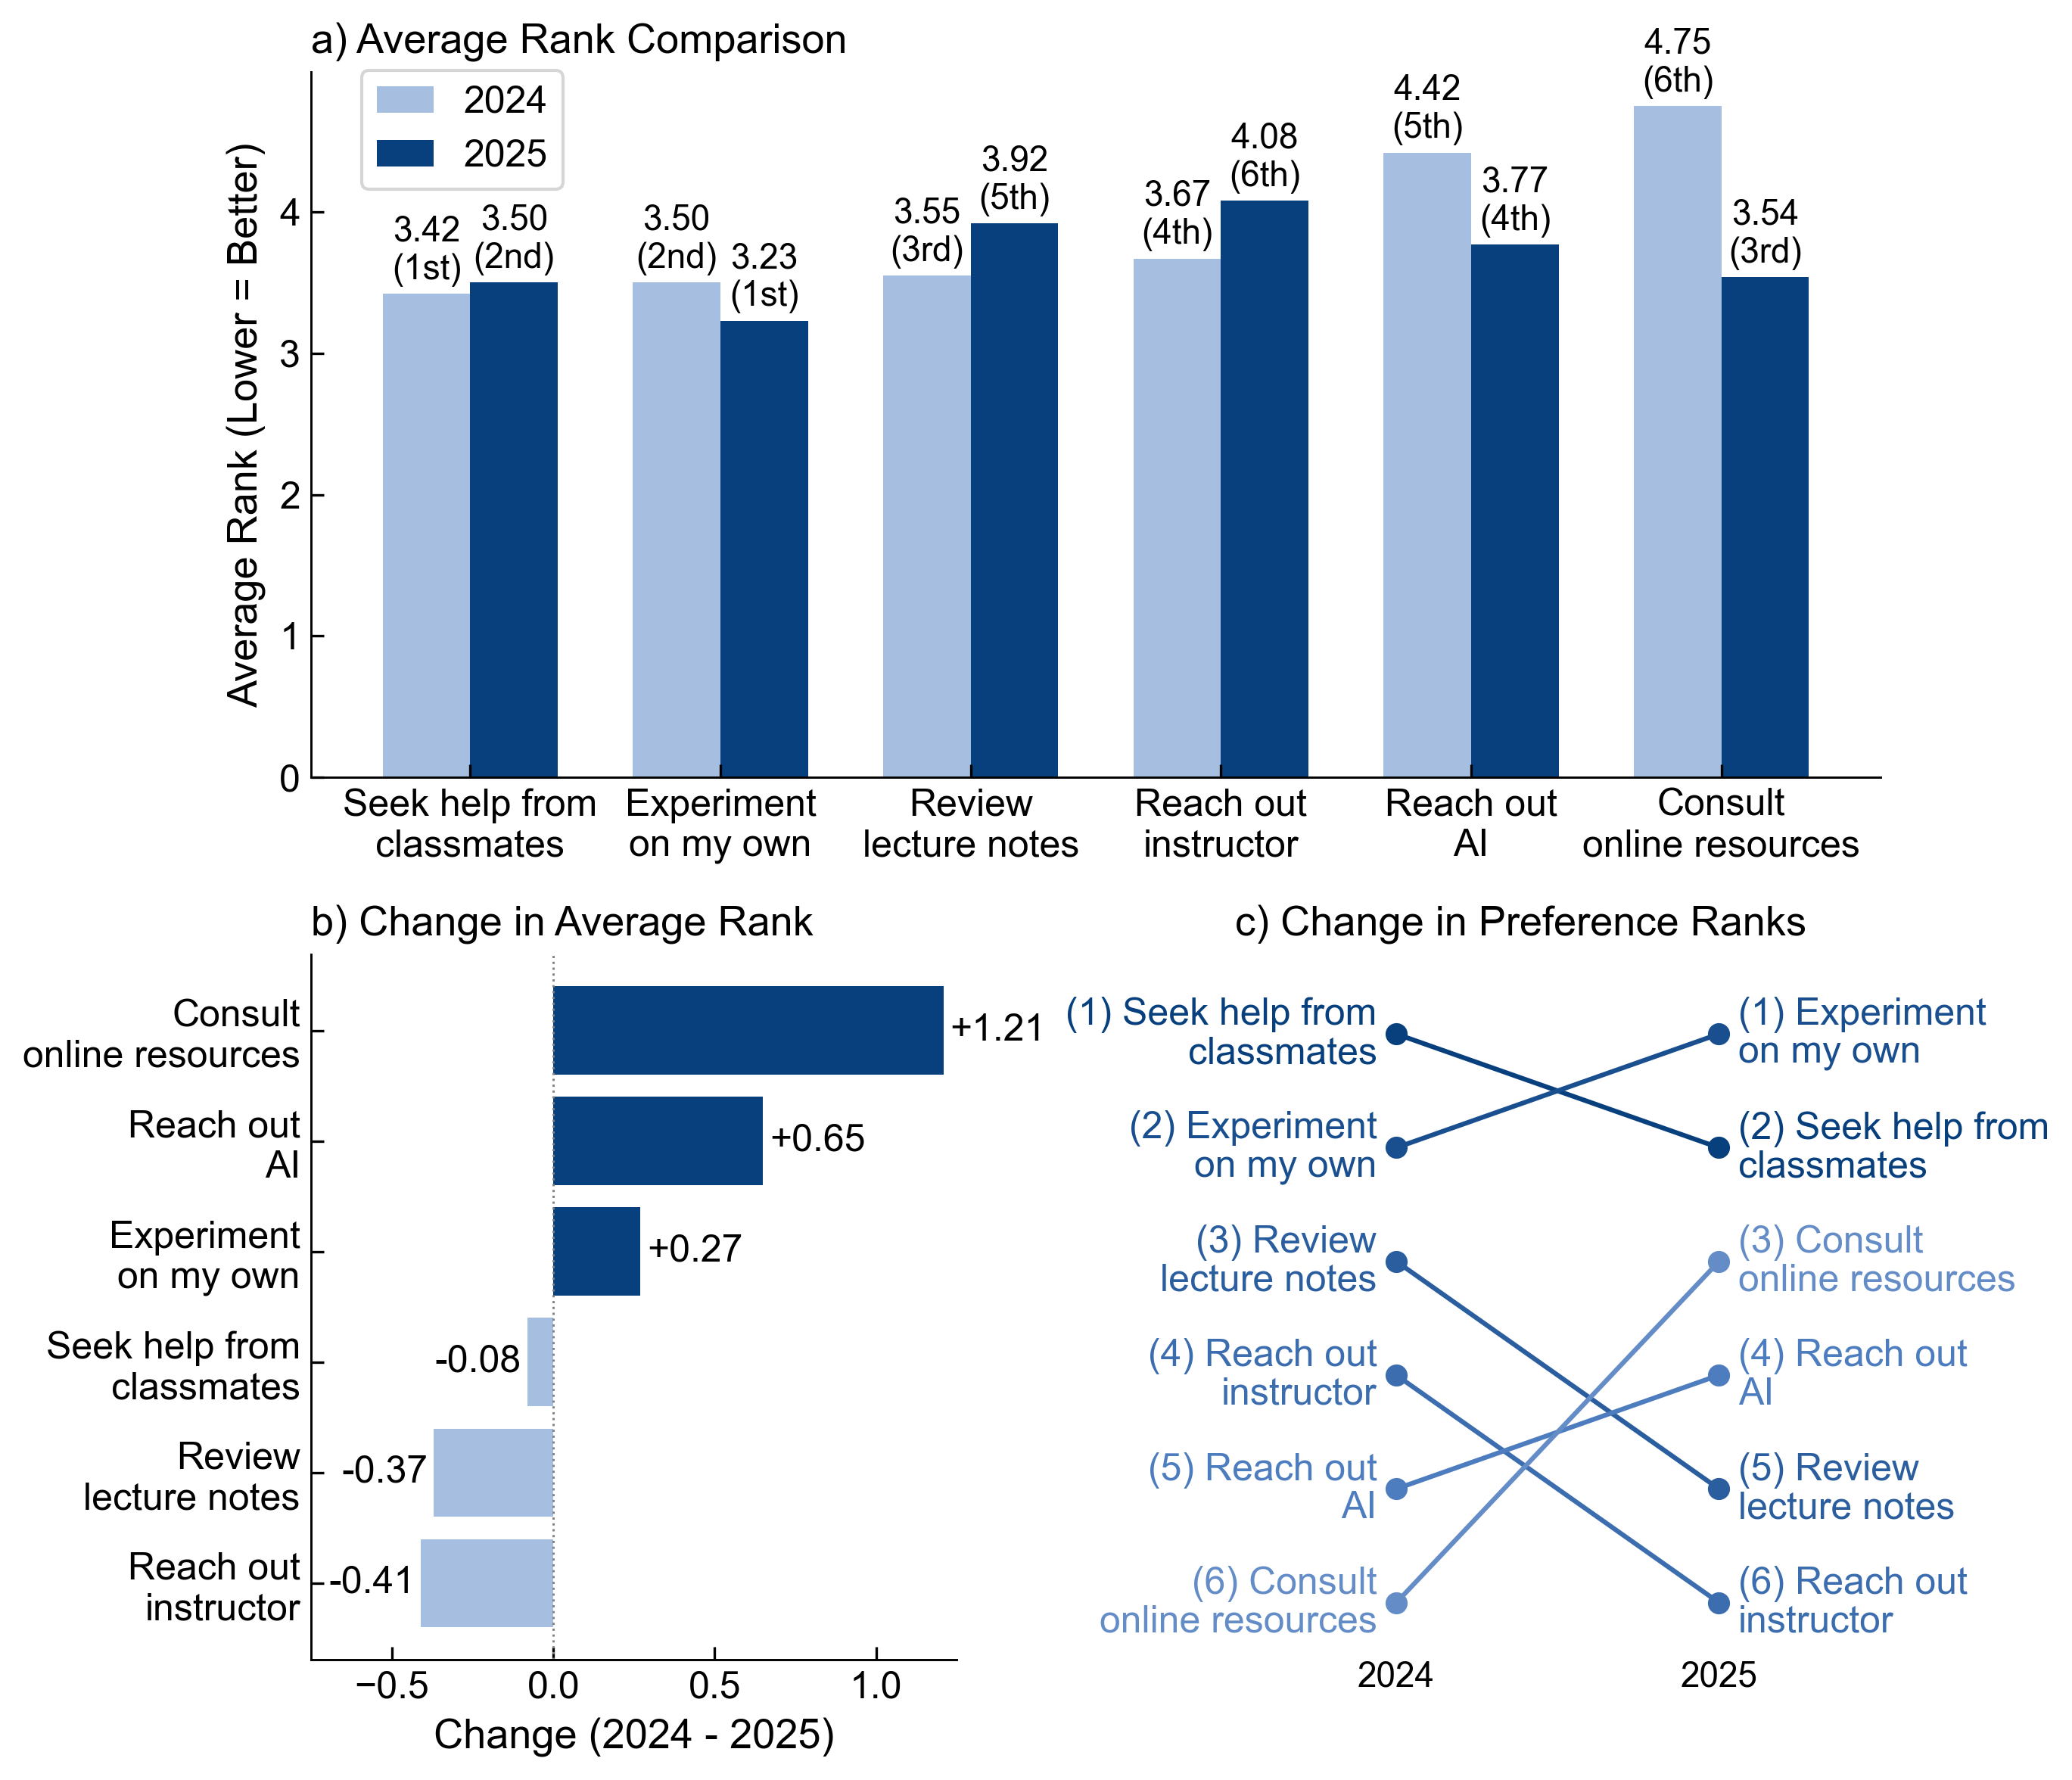

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Set plot style
ff=2
plt.rcParams.update({
    'font.family': 'sans-serif',
    "font.sans-serif": ["Arial", "Helvetica"],
    'font.size': 10+ff,
    'axes.titlesize': 11+ff,
    'axes.labelsize': 11+ff,
    'xtick.labelsize': 10+ff,
    'ytick.labelsize': 10+ff,
    'legend.fontsize': 10+ff,
    'axes.linewidth': 0.7,
    'xtick.direction': 'in',
    'ytick.direction': 'in'
})

# --- Data ---
data = {
    "Help-Seeking Strategy": [
        "Seek help from classmates",
        "Experiment on my own",
        "Review lecture notes",
        "Reach out instructor",
        "Reach out AI",
        "Consult online resources"
    ],
    "2024": [3.42, 3.50, 3.55, 3.67, 4.42, 4.75 ],
    "2025": [3.50, 3.23, 3.92, 4.08, 3.77, 3.54]
}


df = pd.DataFrame(data)
df["Rank 2024"] = df["2024"].rank(method='min')
df["Rank 2025"] = df["2025"].rank(method='min')
df["Change"] =  df["2024"]- df["2025"]
#display(df)

# 2-line x and y axis labels
df["Multiline Labels"] = [
    "Seek help from\nclassmates",
    "Experiment\non my own",
    "Review\nlecture notes",
    "Reach out\ninstructor",
    "Reach out\nAI",  
    "Consult\nonline resources"
]
df["Multiline Strategy"] = df["Multiline Labels"]

# Function for ordinal rank suffix
def get_ordinal_suffix(n):
    if 10 <= n % 100 <= 20:
        return 'th'
    else:
        return {1: 'st', 2: 'nd', 3: 'rd'}.get(n % 10, 'th')

# --- Start Plotting ---
fig = plt.figure(figsize=(9.2, 8), 
                 dpi=300)
gs = fig.add_gridspec(2, 2, height_ratios=[1, 1], width_ratios=[1,1] )

# -------------------- Figure a --------------------
axA = fig.add_subplot(gs[0, :])
x = np.arange(len(df))
width = 0.35
bars_2024 = axA.bar(x - width/2, df["2024"], width, label='2024', color='#A6BEDF')
bars_2025 = axA.bar(x + width/2, df["2025"], width, label='2025', color='#08407E')

axA.set_xticks(x)
axA.set_xticklabels(df["Multiline Labels"], rotation=0, ha='center')
axA.set_ylabel("Average Rank (Lower = Better)")
axA.set_title("a) Average Rank Comparison", loc='left')

axA.legend(loc='upper left', fontsize=10+ff, handlelength=1.5,bbox_to_anchor=(0.02, 1.03))
#axA.legend(frameon=False, ncol=2, loc='upper left', bbox_to_anchor=(0.5, 1.15))

axA.spines[['top', 'right']].set_visible(False)
axA.grid(False)
for i, bar in enumerate(bars_2024):
    yval = df["2024"].iloc[i]
    rank = int(df["Rank 2024"].iloc[i])
    suffix = get_ordinal_suffix(rank)
    axA.text(bar.get_x() + bar.get_width()/2, yval + 0.05,
             f"{yval:.2f}\n({rank}{suffix})", ha='center', va='bottom', fontsize=9+ff)
for i, bar in enumerate(bars_2025):
    yval = df["2025"].iloc[i]
    rank = int(df["Rank 2025"].iloc[i])
    suffix = get_ordinal_suffix(rank)
    axA.text(bar.get_x() + bar.get_width()/2, yval + 0.05,
             f"{yval:.2f}\n({rank}{suffix})", ha='center', va='bottom', fontsize=9+ff)

# -------------------- Figure b --------------------
df_b = df.sort_values(by="Change", ascending=True).reset_index(drop=True)
axB = fig.add_subplot(gs[1, 0])
colors_b = df_b["Change"].apply(lambda x: "#A6BEDF" if x < 0 else "#08407E")

bars_b = axB.barh(df_b["Multiline Strategy"], df_b["Change"], color=colors_b)
axB.axvline(0, color='gray', linestyle='dotted', linewidth=0.7)
axB.set_xlabel("Change (2024 - 2025)")
axB.set_title("b) Change in Average Rank", loc='left')
axB.spines[['top', 'right']].set_visible(False)
axB.set_xlim([-0.75,1.25])
for bar in bars_b:
    w = bar.get_width()
    x_pos = w + 0.02 if w >= 0 else w - 0.02
    ha = 'left' if w >= 0 else 'right'
    axB.text(x_pos, bar.get_y() + bar.get_height()/2,
             f"{w:+.2f}", va='center', ha=ha, fontsize=10+ff)

# -------------------- Figure c --------------------
axC = fig.add_subplot(gs[1, 1])

# Full multiline labels for Figure c
multiline_label_map = {
    "Experiment on my own": "Experiment\non my own",
    "Seek help from classmates": "Seek help from\nclassmates",
    "Consult online resources": "Consult\nonline resources",
    "Reach out AI": "Reach out\nAI",
    "Review lecture notes": "Review\nlecture notes",
    "Reach out instructor": "Reach out\ninstructor"
}
color_map = {
    "Experiment on my own": "#194F8E" ,
    "Seek help from classmates": "#08407E",
    "Consult online resources": "#648DC7",
    "Reach out AI": "#4D7DBF",
    "Review lecture notes": "#2A5E9E",
    "Reach out instructor": "#3C6EAF" 
}


# "#E9EFF7" , #F8E8F3	  # 10%
# "#D3DEEF" , #EFD0E3	  # 20%
# "#A6BEDF" , #DC9EC9     # 40%
# "#7A9DCF" , #CA6CAE     # 60%
# "#648DC7"
# "#4D7DBF" , #B73B92	  # 80%
# "#3C6EAF"               # 90%
# "#2A5E9E"               # 100%
# "#194F8E"               # 110%
# "#08407E" , #8C0A59	  # 120%


df_slope = df.copy()
df_slope["Multiline Label"] = df_slope["Help-Seeking Strategy"].map(multiline_label_map)
df_slope["Color"] = df_slope["Help-Seeking Strategy"].map(color_map)

label_offset = 0.06
for idx, row in df_slope.iterrows():
    x_vals = [0, 1]
    y_vals = [row["Rank 2024"], row["Rank 2025"]]
    label = row["Multiline Label"]
    color = row["Color"]
    axC.plot(x_vals, y_vals, marker='o', color=color, linewidth=1.5)
    axC.text(x_vals[0] - label_offset, y_vals[0], f"({int(row['Rank 2024'])}) {label}",
             ha='right', va='center', fontsize=10+ff, color=color, linespacing=1.1)
    axC.text(x_vals[1] + label_offset, y_vals[1], f"({int(row['Rank 2025'])}) {label}",
             ha='left', va='center', fontsize=10+ff, color=color, linespacing=1.1)
axC.set_xticks([]); axC.set_yticks([])
axC.set_frame_on(False)
axC.set_xlim(-0.5, 1.5)
axC.set_ylim(6.5, 0.5)



# Axis labels
axC.text(0, 6.8, "2024", ha='center', va='bottom', fontsize=11)
axC.text(1, 6.8, "2025", ha='center', va='bottom', fontsize=11)

axC.set_xticks([]); axC.set_yticks([])
axC.set_frame_on(False)
axC.set_xlim(-0.5, 1.5)
axC.set_ylim(6.5, 0.3)
axC.set_title("c) Change in Preference Ranks", loc='left')



# -------------------- Export --------------------
plt.tight_layout(rect=[0, 0, 1, 1])
#fig.subplots_adjust(left=0.0, right=1.0, top=1.0, bottom=0.0, wspace=0.2, hspace=0.25)

plt.savefig("figures/Fig03_Help_Seeking_Strategy.png", format="png", dpi=300)
plt.show()


### 4.2 Increased reliance with reduced application difficulty 

Q6 (2024) vs. 2025: “When I solve an environmental data science problem, I heavily rely on AI”

2024 Response Distribution:
Strongly agree: 1 respondent
Agree: 5 respondents
Neutral: 4 respondents
Disagree: 2 respondents
Strongly Disagree: 0 respondents

Interpretation:
- Most students lean toward agreement or neutrality, with a small portion strongly agreeing or disagreeing. This suggests a moderate-to-high integration of AI tools in students’ workflows, but not universal or uncritical reliance.

2025 Response Distribution:
- Strongly agree: 4
- Agree: 5
- Neutral: 3
- Disagree: 1
- Strongly Disagree: 0

Interpretation:
- Most students (9 out of 13) either Agree or Strongly Agree that they heavily rely on AI for solving problems—an increase in intensity compared to 2024, where only 1 student “Strongly Agreed” and 5 “Agreed.”
- The sense of reliance on AI is stronger in 2025, possibly due to increased AI focus in the curriculum or greater familiarity and comfort with AI tools.


Q7 (2024) vs. 2025: 
After I study a topic in this course and feel that I understand it, I have difficulty solving problems on the same topic.

2024 Response Distribution:
- Strongly agree: 1
- Agree: 4
- Neutral: 3  
- Disagree: 3
- Strongly disagree: 1

Interpretation:
- Responses are spread across the spectrum, with a slight lean toward agreement. This implies that while some students grasp the content in theory, translating that understanding into practical problem-solving can be challenging for many. However, the variation suggests a diverse set of learning experiences in the class.

2025 Response Distribution:
- Strongly agree: 1
- Agree: 2 
- Neutral: 6
- Disagree: 4
- Strongly Disagree: 0


Interpretation:
- The majority are Neutral or Disagree (10 out of 13), indicating that fewer students feel challenged in applying concepts after studying them, compared to the more mixed spread in 2024.
- Slight improvement: There appears to be a shift toward greater confidence in translating knowledge into problem-solving, possibly reflecting more effective integration of AI as a learning aid.

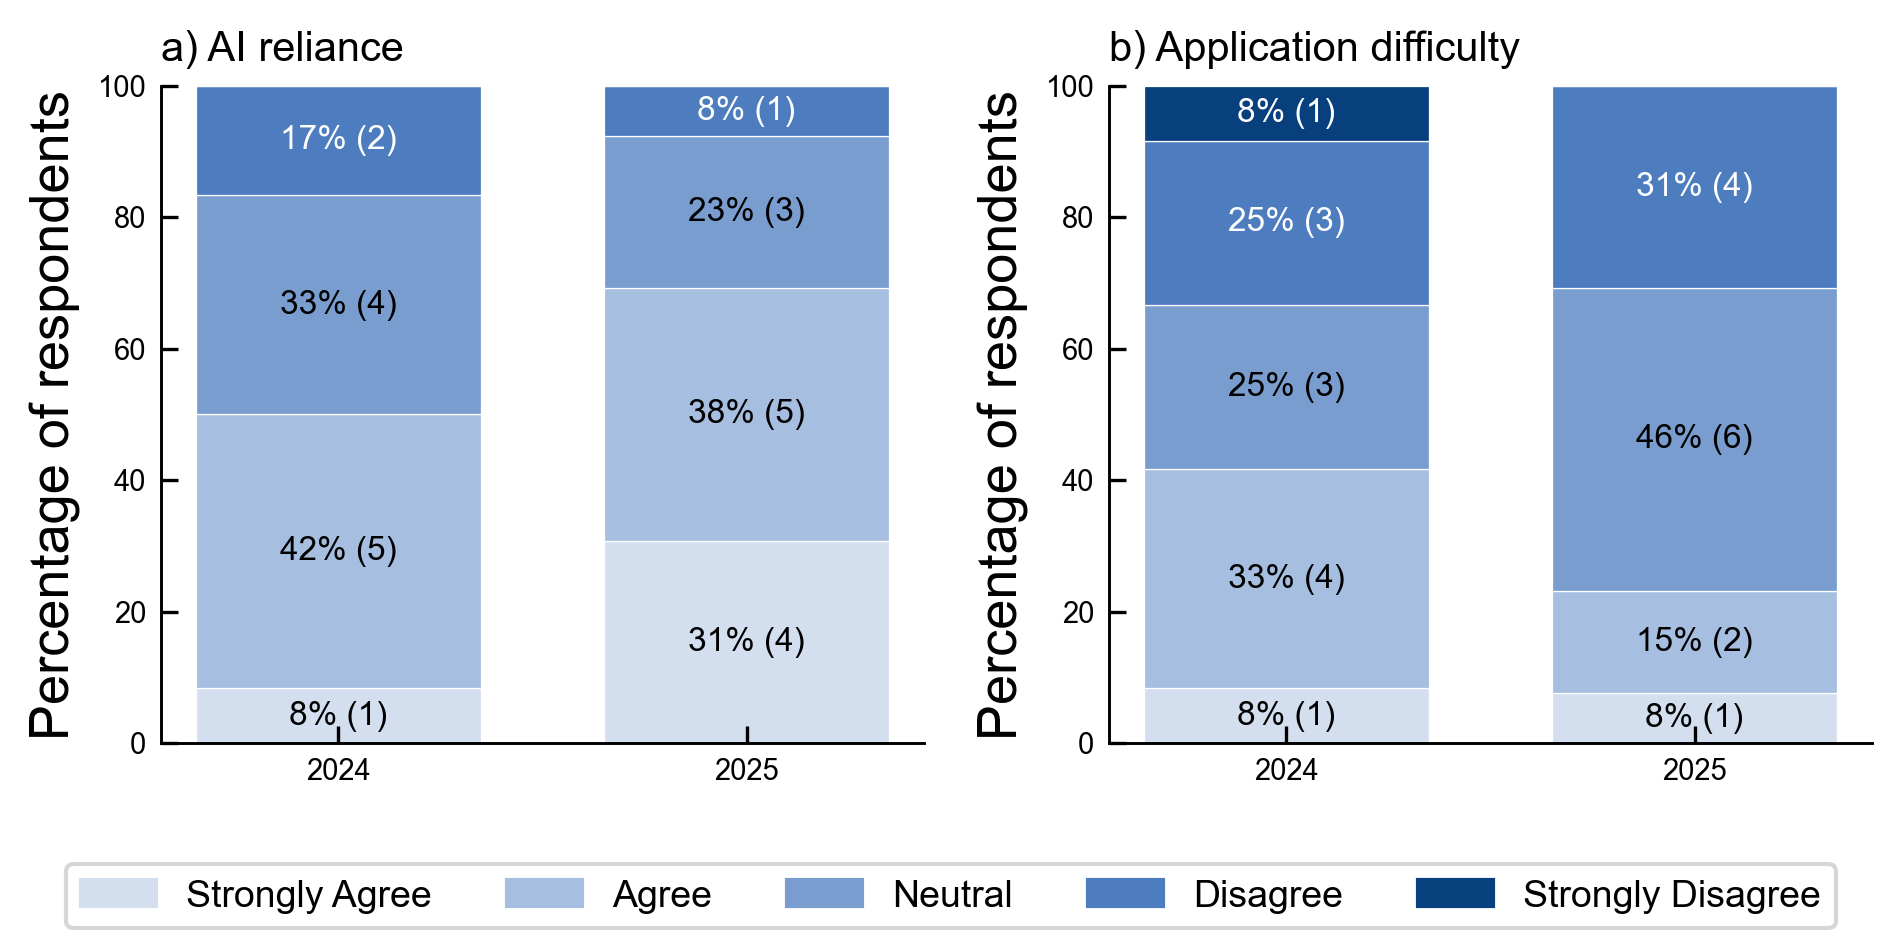

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# --- ETH Blue color palette (light to dark) ---
eth_blue_shades = [
    "#E9EFF7",  # 10%
    "#D3DEEF",  # 20%
    "#A6BEDF",  # 40%
    "#7A9DCF",  # 60%
    "#4D7DBF",  # 80%
    "#08407E"   # 120%
]

ff=2 #Font size factor

# --- Category and color mapping ---
categories = ["Strongly Disagree", "Disagree", "Neutral", "Agree", "Strongly Agree"]
categories_reversed = categories[::-1]  # for top-down plotting
#categories_reversed = categories

eth_blue_colors = {
    "Strongly Disagree": eth_blue_shades[5],
    "Disagree": eth_blue_shades[4],
    "Neutral": eth_blue_shades[3],
    "Agree": eth_blue_shades[2],
    "Strongly Agree": eth_blue_shades[1]
}

# --- Raw response data ---
q6_2024_raw = {"Strongly Agree": 1, "Agree": 5, "Neutral": 4, "Disagree": 2, "Strongly Disagree": 0}
q6_2025_raw = {"Strongly Agree": 4, "Agree": 5, "Neutral": 3, "Disagree": 1, "Strongly Disagree": 0}
q7_2024_raw = {"Strongly Agree": 1, "Agree": 4, "Neutral": 3, "Disagree": 3, "Strongly Disagree": 1}
q7_2025_raw = {"Strongly Agree": 1, "Agree": 2, "Neutral": 6, "Disagree": 4, "Strongly Disagree": 0}

# --- Convert to ordered percentage vectors ---
def build_plot_data(response_dict):
    total = sum(response_dict.values())
    return [100 * response_dict.get(cat, 0) / total for cat in categories_reversed]

q6_2024_pct = build_plot_data(q6_2024_raw)
q6_2025_pct = build_plot_data(q6_2025_raw)
q7_2024_pct = build_plot_data(q7_2024_raw)
q7_2025_pct = build_plot_data(q7_2025_raw)

# --- Determine text color based on ETH contrast rules ---
def get_label_color(cat):
    if cat in ["Strongly Disagree", "Disagree"]:  # ≥80% shade
        return "white"
    else:  # <60%
        return "black"

# --- Plot function ---
def plot_eth_accessible(ax, pct_2024, pct_2025, raw_2024, raw_2025, title):
    bar_width = 0.7
    x = np.array([0, 1])
    bottom_2024 = 0
    bottom_2025 = 0

    for j, cat in enumerate(categories_reversed):
        val_2024 = pct_2024[j]
        val_2025 = pct_2025[j]
        count_2024 = raw_2024[categories_reversed[j]]
        count_2025 = raw_2025[categories_reversed[j]]
        color = eth_blue_colors[cat]
        label_color = get_label_color(cat)

        ax.bar(x[0], val_2024, bar_width, bottom=bottom_2024, color=color,
               edgecolor='white', linewidth=0.3)
        ax.bar(x[1], val_2025, bar_width, bottom=bottom_2025, color=color,
               edgecolor='white', linewidth=0.3)

        if val_2024 > 4:
            ax.text(x[0], bottom_2024 + val_2024 / 2,
                    f"{val_2024:.0f}% ({count_2024})", ha='center', va='center',
                    fontsize=6+ff, color=label_color, linespacing=1.2)
        if val_2025 > 4:
            ax.text(x[1], bottom_2025 + val_2025 / 2,
                    f"{val_2025:.0f}% ({count_2025})", ha='center', va='center',
                    fontsize=6 +ff, color=label_color, linespacing=1.2)

        bottom_2024 += val_2024
        bottom_2025 += val_2025

    ax.set_xticks(x)
    ax.set_xticklabels(["2024", "2025"])
    ax.set_title(title, loc='left', fontsize=8+ff)
    ax.spines[['top', 'right']].set_visible(False)
    ax.tick_params(axis='x', labelsize=7)
    ax.tick_params(axis='y', labelsize=7)
    ax.set_ylabel("Percentage of respondents")
    ax.grid(False)

# --- Generate figure ---
fig, axes = plt.subplots(1, 2, figsize=(6.5, 3.2), dpi=300)

plot_eth_accessible(axes[0], q6_2024_pct, q6_2025_pct, q6_2024_raw, q6_2025_raw, "a) AI reliance")
plot_eth_accessible(axes[1], q7_2024_pct, q7_2025_pct, q7_2024_raw, q7_2025_raw, "b) Application difficulty")

# --- Add legend ---
handles = [plt.Rectangle((0,0),1,1, color=eth_blue_colors[cat]) for cat in categories_reversed]
fig.legend(handles, categories_reversed, title="", loc='lower center',
           ncol=5, fontsize=7+ff, title_fontsize=8+ff)

plt.tight_layout(rect=[0, 0.1, 1, 1])
plt.savefig("figures/Fig04_Reliance_Application.png", dpi=300)
plt.show()


### 4.3 Affective climate from critique to endorsement 

#### Sentiment analysis: Polarity and subjectivity scores 

Analyzing sentiment to understand perceptions of AI in education. Sentiment analysis is a nuanced computational approach aimed at understanding and categorizing emotions expressed in textual data. At its core, it involves two main dimensions: polarity and subjectivity. Polarity measures the emotional tone as positive, neutral, or negative, which is traditionally calculated using sentiment lexicons. These lexicons are standardized dictionaries containing words associated with positive and negative scores, allowing for an aggregated sentiment assessment of text—where values closer to 1 reflect positivity and those toward -1 reflect negativity. Subjectivity, on the other hand, quantifies the degree of personal opinion, emotion, or judgment, as opposed to factual information. It assigns scores nearing 1 to highly subjective content and scores near 0 to objective content. This method relies on linguistic heuristics and lexical resources to parse narratives and extracts underlying sentiments.

In our implementation, we applied this methodology using the TextBlob package, which encapsulates these lexicons and sentiment computation techniques to deliver polarity and subjectivity scores for the text data, allowing for an efficient and reproducible analysis of student survey responses. This enabled us to systematically quantify and compare emotional responses to AI technologies across different years, yielding valuable insights into educational impacts. The analysis revealed individual sentiment characteristics for each survey response, enabling us to compile a DataFrame that categorized the emotional tone of student feedback across the two years. This structured data format not only supports evaluating shifts in student attitudes over time but also provides a foundation for correlating these sentiments with broader trends in AI usage within educational frameworks.

In [4]:
from textblob import TextBlob

responses_2024 = [
    "The use of LLM has been helpful but also lackluster as sometimes the LLM model is not structured to assist with certain things that I would need to be fixed.",
    "Jupiter AI was unhelpful because it did not work. chatgpt was slightly helpful but it would be bad if I became too reliant on it",
    "It helped me dive into the errors and understand why I was getting them and how to fix them.",
    "It has positively impacted learning by helping me diagnose errors when other resources, such as stack exchange and github forums, are unclear.",
    "It has helped a lot, I actually think more time allotted to AI coding assistance would have been an efficient use of time and would allow for less time to be focused on Pandas/NumPy/Xarray",
    "AI coding assistance has helped me build the skeleton of my project and assisted me during homework problems.",
    "It was good to me! I like having a back up help when I can not resolve problems.",
    "Helped.",
    "Negatively, it does not really help me much when I am learning extremely hard codes, and the AI gives me complicated results, but the rest is positive for basic simple code.",
    "I used ChatGPT a lot in this course. I am disappointed that Jupyter AI did not work as well for me. I feel like while I am using ChatGPT I am not learning as much as I could, so I wish I had a stronger foundation without it instead of heavily relying on it.",
    "It has allowed me to understand topics without seeking assistance first.",
    "I believe it helps me solve problems and makes the class seem more helpful, instead of learning to pass a test we are actually learning to solve problems."
]

# Responses from 2025 survey
responses_2025 = [
    "It definitely helped as a resource. If I couldn't get something right - it was very helpful in working through it with me. Also, when it came to more complicated tasks AI was able to handle them quickly - there was some coding that would have taken me weeks to figure out that AI did in no time.",
    "I think it helped when stuck and made sure I was able to get assignments done but sometimes the code given by AI was much different than what we learned in class so it could be hard to follow.",
    "It has helped positively. I am able to solve problems and become much more efficient at solving errors rather than spending hours on trying to figure out which small typo is preventing code from working. Negative impacts could be too much reliance; however, I really only use AI to learn, so I find it beneficial especially off campus when I am solving problems on my own and have questions.",
    "It helped me better understand the topics taught in class",
    "It's made me feel more comfortable with coding and understanding data",
    "Helped me, yet causes me to overly rely.",
    "AI integration actually has helped me to learn the coding topics a lot better and has helped me understand and implement proper etiquette for coding. I think however, that sometimes I rely a little too much on it sometimes, and I would have to go back and make changes that had to be done.",
    "It has helped immensely, when I get stuck I am able to figure it out with AI and learn rather than getting frustrated.",
    "I haven't found a topic where AI is as useful as coding. Of course I've tried it with other subjects, but coding is clearly where it strives. I also found that something I had previously neglected but used extensively since the start of this class was the search feature. Being able to find articles that are relevant to precisely what I need is an amazing tool that search engines are less consistent with.",
    "It allowed me to develop code and ideas far beyond my abilities, while providing documentation to let me go through it and understand what it was saying. It was very helpful and can help put my thought to code.",
    "It has had a positive impact on my education mainly by being able to identify issues that I was unable to see in my codes.",
    "I used it mostly because I had fallen behind. I prefer not to use it because I believe the more I use it the more I will rely on it and that reliance will undermine my core understanding of the lesson material.",
    "I think that if you immerse yourself and want to learn coding you will learn it, if you have little to no interest in it you will scoot by using AI and not learn that much"
]

# Analyze sentiment
def analyze_sentiment(responses):
    return [(TextBlob(r).sentiment.polarity, TextBlob(r).sentiment.subjectivity) for r in responses]

sentiment_2024 = analyze_sentiment(responses_2024)
sentiment_2025 = analyze_sentiment(responses_2025)

# Prepare results
df_sentiment = pd.DataFrame({
    "Year": ["2024"] * len(responses_2024) + ["2025"] * len(responses_2025),
    "Response": responses_2024 + responses_2025,
    "Polarity": [p for p, s in sentiment_2024] + [p for p, s in sentiment_2025],
    "Subjectivity": [s for p, s in sentiment_2024] + [s for p, s in sentiment_2025]
})


# Save the DataFrame to a CSV file
df_sentiment.to_csv("data/Sentiment_Analysis_of_AI_Survey_Responses.csv")

# Display the DataFrame
display(df_sentiment)

,Year,Response,Polarity,Subjectivity
0,2024,The use of LLM has been helpful but also lackl...,0.157143,0.385714
1,2024,Jupiter AI was unhelpful because it did not wo...,-0.433333,0.416667
2,2024,It helped me dive into the errors and understa...,0.000000,0.000000
3,2024,It has positively impacted learning by helping...,0.034091,0.473485
4,2024,"It has helped a lot, I actually think more tim...",0.111111,0.222222
5,2024,AI coding assistance has helped me build the s...,0.000000,0.000000
6,2024,It was good to me! I like having a back up hel...,0.437500,0.300000
7,2024,Helped.,0.000000,0.000000
8,2024,"Negatively, it does not really help me much wh...",-0.095549,0.421158
9,2024,I used ChatGPT a lot in this course. I am disa...,-0.250000,0.483333


#### Bar plot for polarity and subjectivity classifications
Figure 4. Sentiment polarity and subjectivity classifications in student reflections on AI-assisted learning in Spring 2024 and 2025.
Top row: polarity type distribution (%) and example quotes.
Bottom row: subjectivity type distribution (%) and example quotes.
Thematic quotes illustrate how learners expressed personal attitudes across positive, neutral, and negative tone as well as subjective and objective evaluations.
Sample sizes: Spring 2024 (N={sample_sizes.get("2024", "NA")}), Spring 2025 (N={sample_sizes.get("2025", "NA")}).


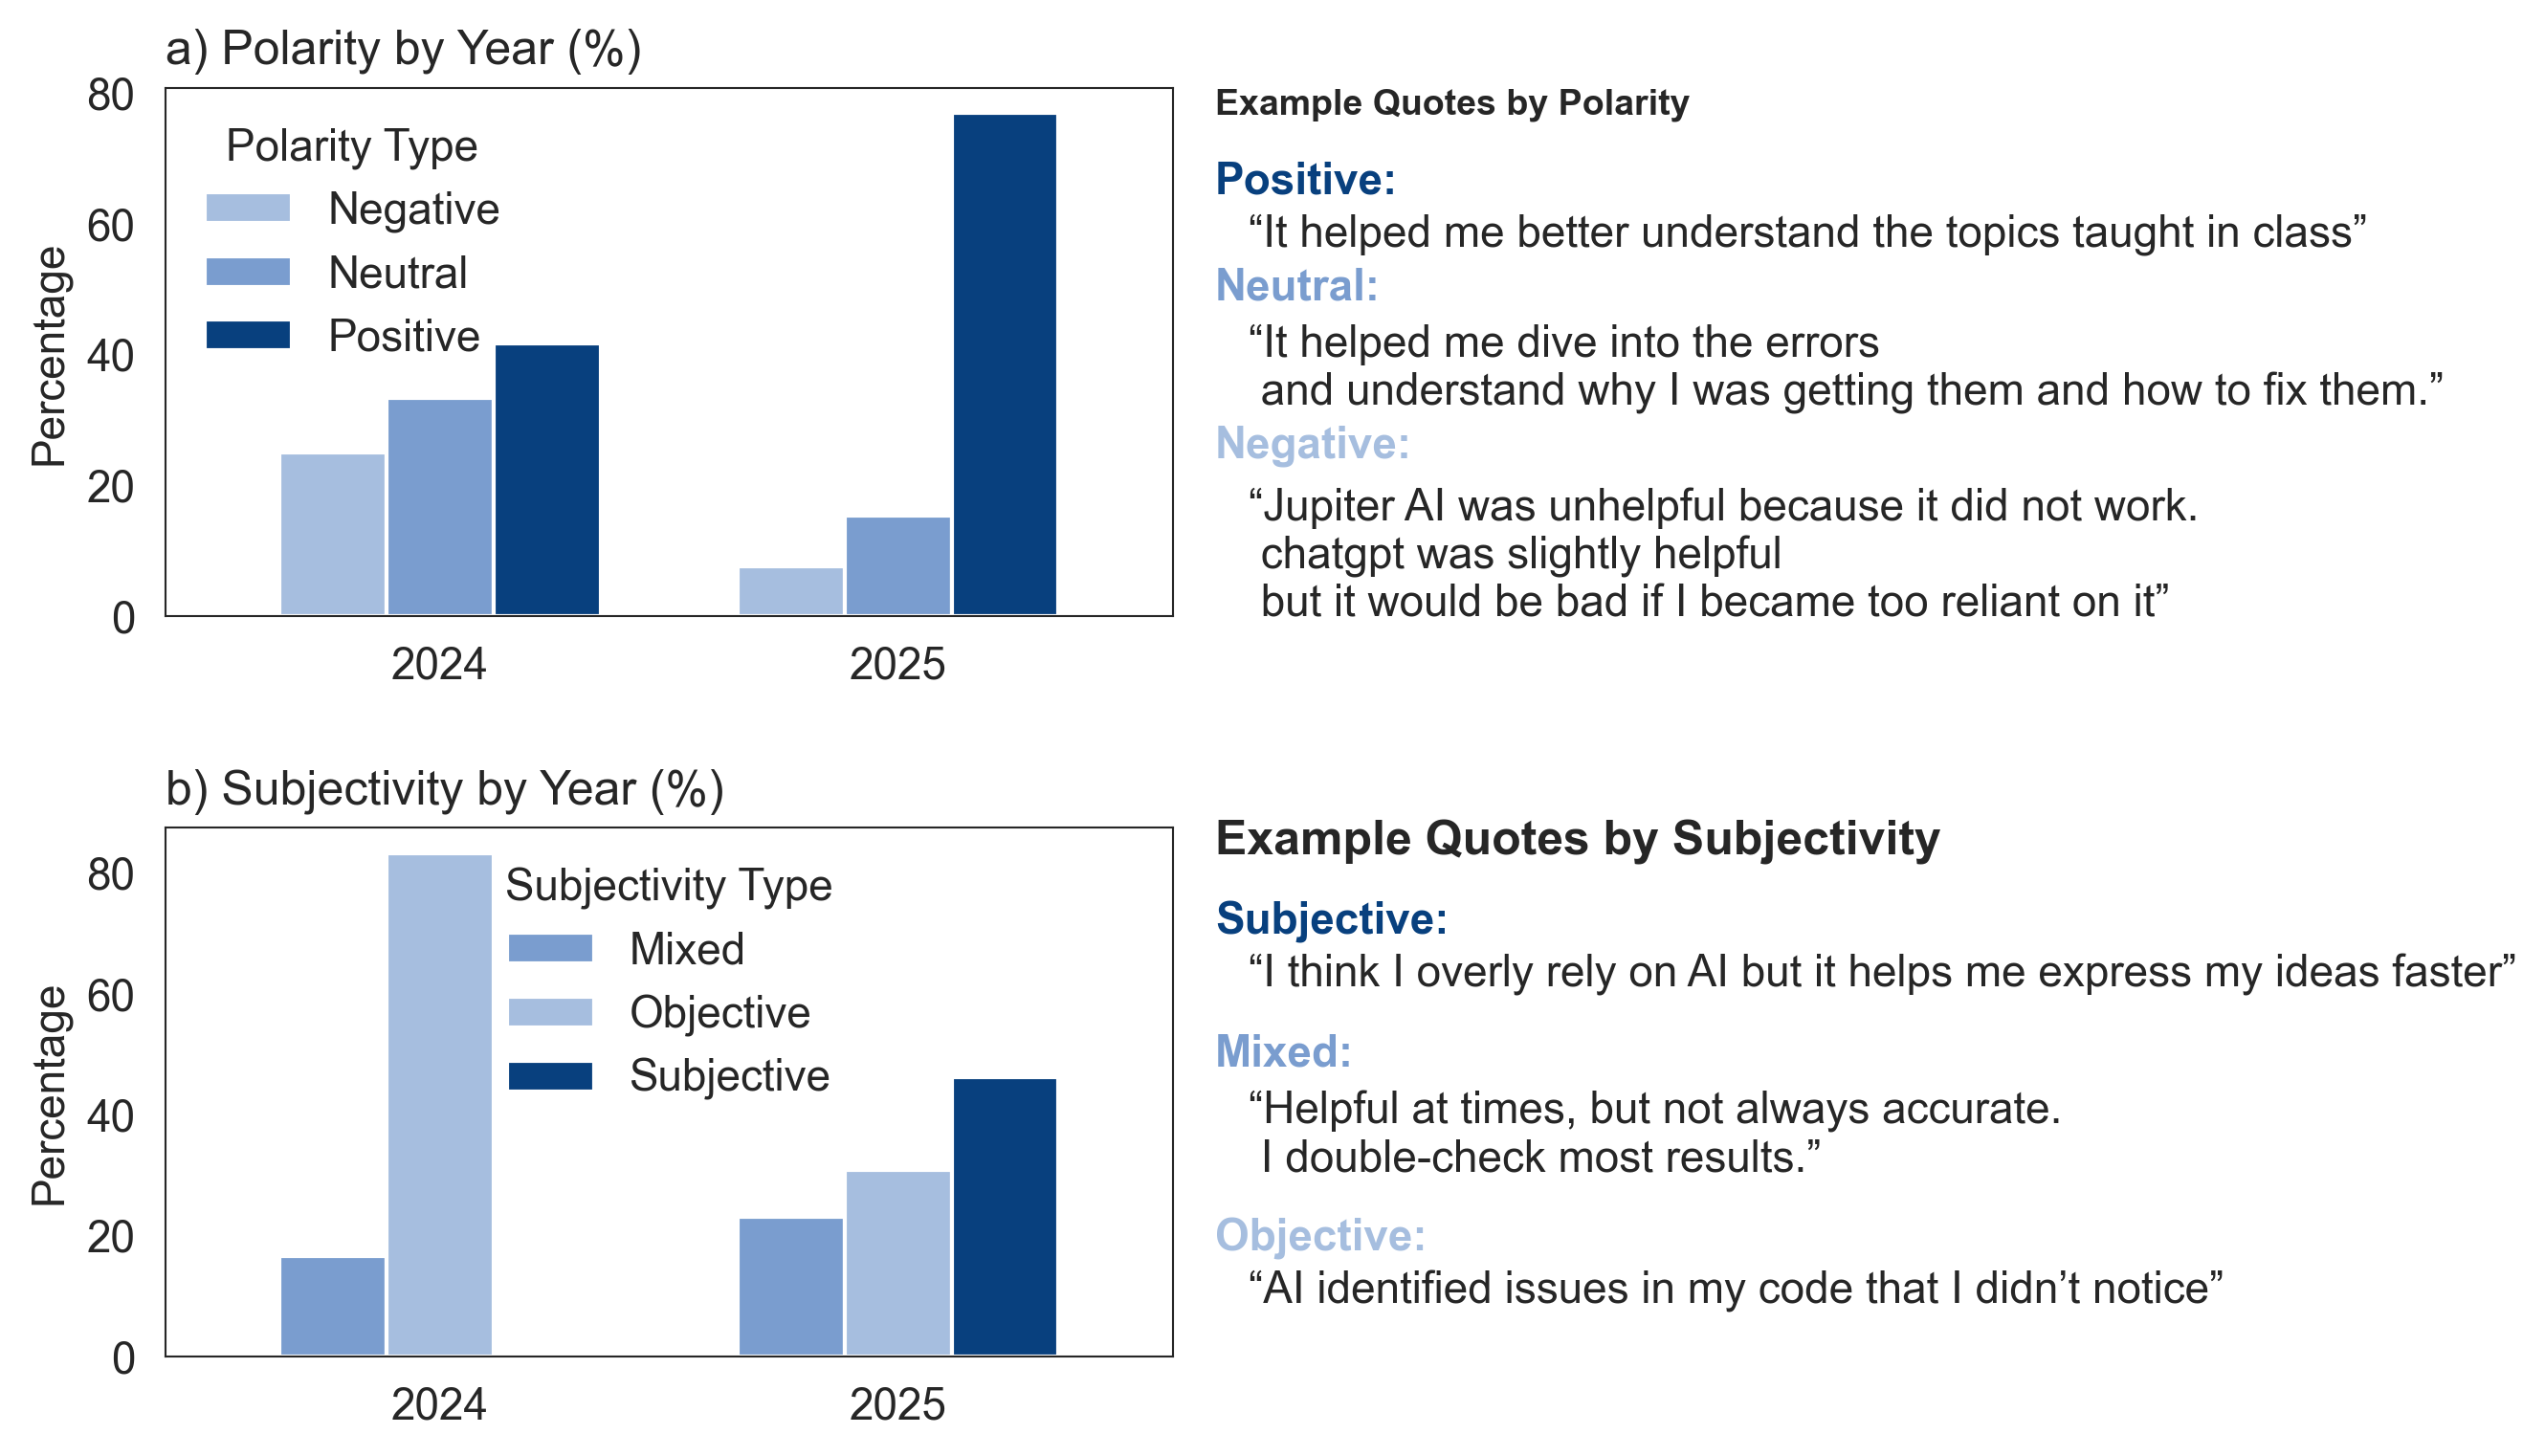

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec

# Responses from 2024 survey
# Load the sentiment data
df = pd.read_csv("data/Sentiment_Analysis_of_AI_Survey_Responses.csv")
df["Year"] = df["Year"].astype(str)

# Define polarity and subjectivity categorization
def categorize_polarity(p):
    if p > 0.05:
        return "Positive"
    elif p < -0.05:
        return "Negative"
    else:
        return "Neutral"

def categorize_subjectivity(s):
    if s > 0.55:
        return "Subjective"
    elif s < 0.45:
        return "Objective"
    else:
        return "Mixed"

df["PolarityType"] = df["Polarity"].apply(categorize_polarity)
df["SubjectivityType"] = df["Subjectivity"].apply(categorize_subjectivity)

# Sample sizes
sample_sizes = df["Year"].value_counts().to_dict()

# Percent data
polarity_pct = df.groupby(["Year", "PolarityType"]).size().unstack(fill_value=0)
polarity_pct = (polarity_pct.T / polarity_pct.sum(axis=1)).T * 100

subjectivity_pct = df.groupby(["Year", "SubjectivityType"]).size().unstack(fill_value=0)
subjectivity_pct = (subjectivity_pct.T / subjectivity_pct.sum(axis=1)).T * 100

# Quotes (quotes dictionary provided in the code snippet you shared)
quotes = {
    "Positive": "“It helped me better understand the topics taught in class”",
    "Neutral": "“It helped me dive into the errors\n and understand why I was getting them and how to fix them.”",
    "Negative": "“Jupiter AI was unhelpful because it did not work.\n chatgpt was slightly helpful\n but it would be bad if I became too reliant on it”",
    "Subjective": "“I think I overly rely on AI but it helps me express my ideas faster”",
    "Objective": "“AI identified issues in my code that I didn’t notice”",
    "Mixed": "“Helpful at times, but not always accurate.\n I double-check most results.”"
}

# Plot config
ff=3
sns.set_style("white")  # Change from whitegrid to remove grid lines
plt.rcParams.update({
    "font.family": "sans-serif",
    "font.size": 8+ff,
    "axes.titlesize": 9+ff,
    "axes.labelsize": 8+ff,
    "xtick.labelsize": 8+ff,
    "ytick.labelsize": 8+ff,
    "legend.fontsize": 8+ff,
    "figure.dpi": 300,
    "axes.linewidth": 0.5,
    "xtick.major.width": 0.5,
    "ytick.major.width": 0.5
})

# "#E9EFF7" , #F8E8F3	  # 10%
# "#D3DEEF" , #EFD0E3	  # 20%
# "#A6BEDF" , #DC9EC9     # 40%
# "#7A9DCF" , #CA6CAE     # 60%
# "#4D7DBF" , #B73B92	  # 80%
# "#08407E" , #8C0A59	  # 120%


# Figure layout
fig = plt.figure(figsize=(7.5, 5.2))
gs = gridspec.GridSpec(2, 2, width_ratios=[1.5, 1], height_ratios=[1, 1], wspace=0.05, hspace=0.4)

# Panel (1,1): Polarity
ax1 = fig.add_subplot(gs[0, 0])
#Red (light), gray (medium), green (dark)
polarity_pct.plot(kind="bar", ax=ax1, color=["#A6BEDF", "#7A9DCF" , "#08407E"], edgecolor='white', width=0.7)
ax1.set_title("a) Polarity by Year (%)", loc='left')
ax1.set_ylabel("Percentage")
ax1.set_xlabel("")
ax1.set_xticklabels(["2024", "2025"], rotation=0)  # Set rotation to 0 for horizontal labels
ax1.legend(title="Polarity Type", frameon=False, loc='upper left')


# Panel (1,2): Polarity quotes
ax2 = fig.add_subplot(gs[0, 1])
ax2.axis("off")
ax2.text(0, 0.95, "Example Quotes by Polarity", fontsize=9, fontweight='bold')
ax2.text(0, 0.8, "Positive:", fontweight='bold', color="#08407E")
ax2.text(0.05, 0.7, quotes["Positive"], fontsize=8+ff)
ax2.text(0, 0.6, "Neutral:", fontweight='bold', color="#7A9DCF")
ax2.text(0.05, 0.4, quotes["Neutral"], fontsize=8+ff)
ax2.text(0, 0.3, "Negative:", fontweight='bold', color="#A6BEDF")
ax2.text(0.05, 0.0, quotes["Negative"], fontsize=8+ff)

# Panel (2,1): Subjectivity
ax3 = fig.add_subplot(gs[1, 0])
subjectivity_pct.plot(kind="bar", ax=ax3, color=["#7A9DCF","#A6BEDF", "#08407E"], edgecolor='white', width=0.7)
ax3.set_title("b) Subjectivity by Year (%)", loc='left')
ax3.set_ylabel("Percentage")
ax3.set_xlabel("")
ax3.set_xticklabels(["2024", "2025"], rotation=0)  # Set rotation to 0 for horizontal labels
ax3.legend(title="Subjectivity Type", frameon=False, loc='upper center')


# Panel (2,2): Subjectivity quotes
ax4 = fig.add_subplot(gs[1, 1])
ax4.axis("off")
ax4.text(0, 0.95, "Example Quotes by Subjectivity", fontsize=9+ff, fontweight='bold')
ax4.text(0, 0.8, "Subjective:", fontweight='bold', color="#08407E")
ax4.text(0.05, 0.7, quotes["Subjective"], fontsize=8+ff)
ax4.text(0, 0.55, "Mixed:", fontweight='bold', color="#7A9DCF")
ax4.text(0.05, 0.35, quotes["Mixed"], fontsize=8+ff)
ax4.text(0, 0.2, "Objective:", fontweight='bold', color="#A6BEDF")
ax4.text(0.05, 0.1, quotes["Objective"], fontsize=8+ff)

# Adjusts spacing (potential alternative to plt.tight_layout())
fig.subplots_adjust(top=0.95, bottom=0.1, left=0.1, right=0.9, hspace=0.45, wspace=0.3)

plt.savefig("figures/Fig05_Sentiment_Qoute_Bar.png", format="png", bbox_inches="tight")



#### Scatter plot of polarity and subjectivity scores
Figure X. Polarity and subjectivity scores of student reflections on AI use, by year. Dashed lines mark neutral polarity (x = 0) and moderate subjectivity (y = 0.5). Spring 2025 responses (orange) show a trend toward the top-right quadrant, reflecting stronger endorsement and more personal engagement with AI tools. Quadrant annotations summarize tone combinations.

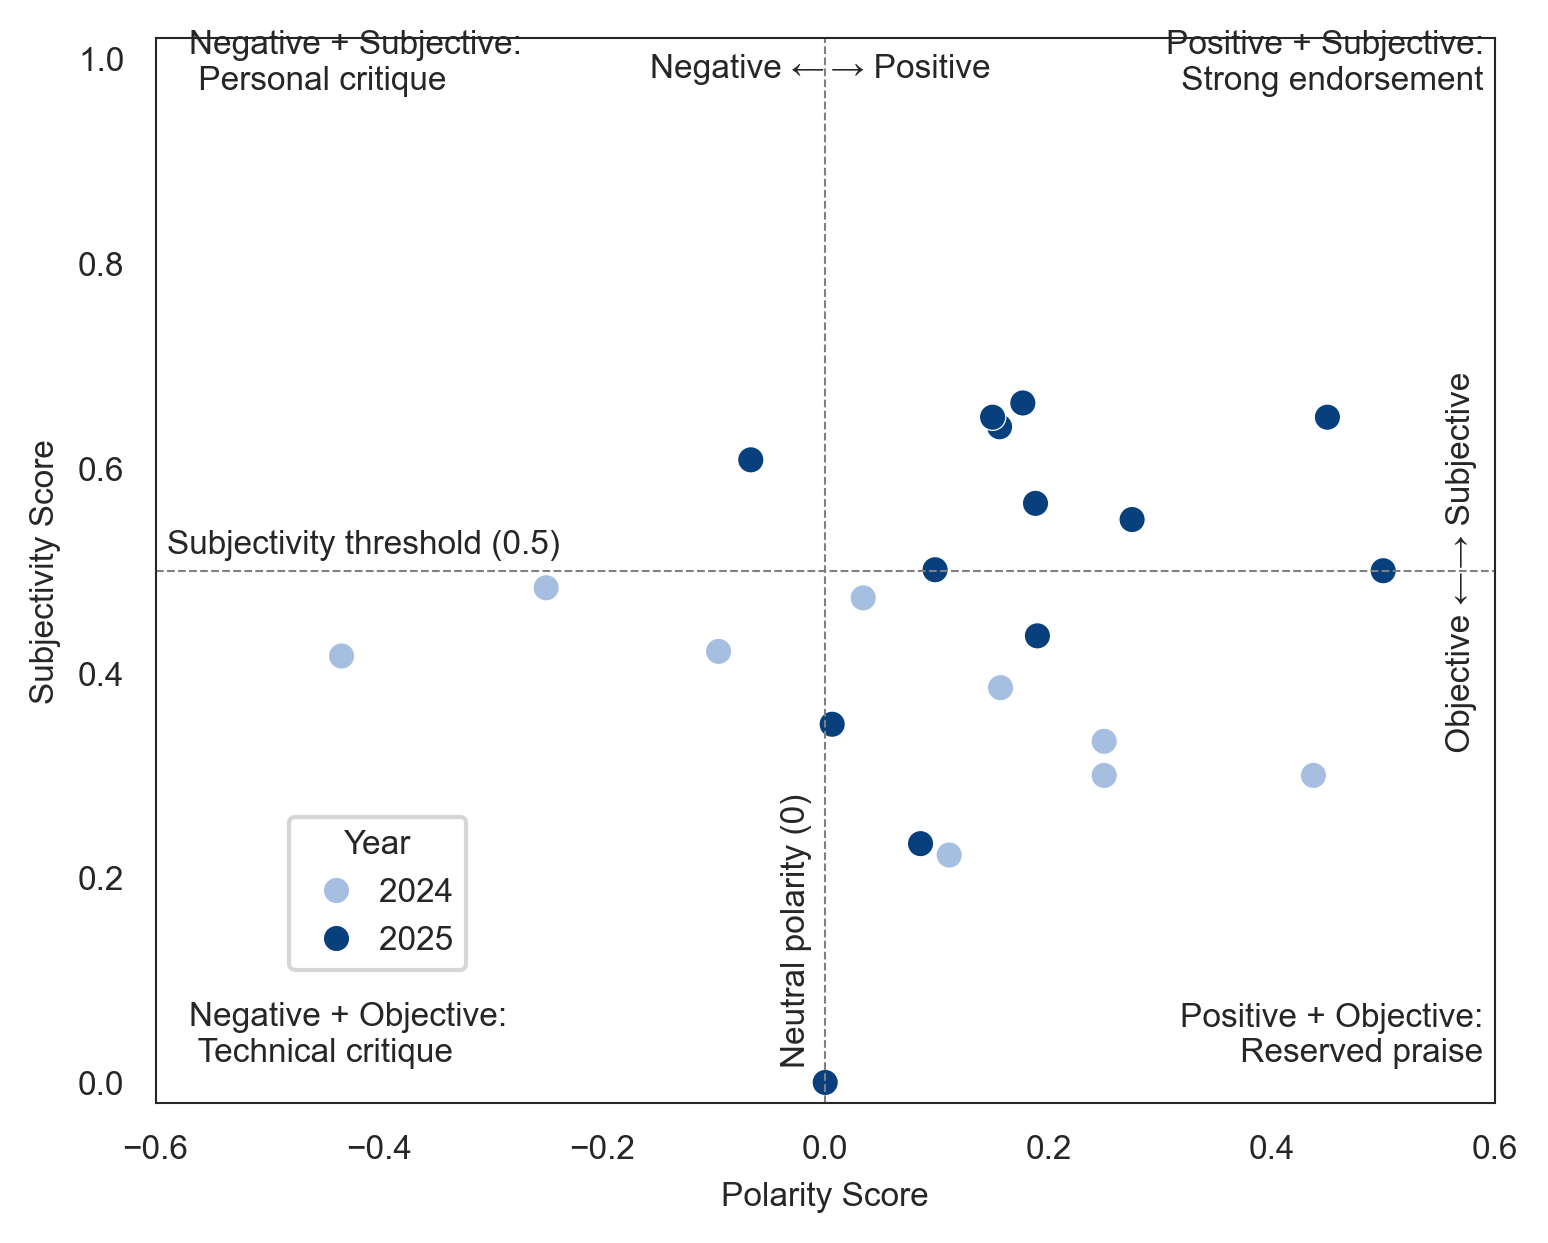

In [6]:
# Load the sentiment data
df = pd.read_csv("data/Sentiment_Analysis_of_AI_Survey_Responses.csv")
df["Year"] = df["Year"].astype(str)

# Define color palette
#palette = {"2024": "blue", "2025": "orange"}
palette = {"2024": "#A6BEDF" , "2025": "#08407E"}

# "#E9EFF7" , #F8E8F3	  # 10%
# "#D3DEEF" , #EFD0E3	  # 20%
# "#A6BEDF" , #DC9EC9     # 40%
# "#7A9DCF" , #CA6CAE     # 60%
# "#4D7DBF" , #B73B92	  # 80%
# "#08407E" , #8C0A59	  # 120%


# Set Nature-style figure formatting
plt.rcParams.update({
    "font.family": "sans-serif",
    "font.sans-serif": ["Arial", "Helvetica"],
    "font.size": 8,
    "axes.titlesize": 9,
    "axes.labelsize": 8,
    "xtick.labelsize": 8,
    "ytick.labelsize": 8,
    "legend.fontsize": 8,
    "figure.dpi": 300,
    "axes.linewidth": 0.5,
    "xtick.major.width": 0.5,
    "ytick.major.width": 0.5
})

# Start figure
plt.figure(figsize=(5.2, 4.2))

# Scatterplot
sns.scatterplot(
    data=df,
    x="Polarity",
    y="Subjectivity",
    hue="Year",
    palette=palette,
    s=40,
    edgecolor='white',
    linewidth=0.3
)


# Threshold lines
plt.axhline(0.5, linestyle='--', color='gray', linewidth=0.5)
plt.axvline(0, linestyle='--', color='gray', linewidth=0.5)

# Threshold labels (shifted to avoid overlap)
plt.text(-0.59, 0.54, "Subjectivity threshold (0.5)", fontsize=8, va='top')
plt.text(-0.04, 0.015, "Neutral polarity (0)", rotation=90, fontsize=8, va='bottom')

# Quadrant annotations
plt.text(0.59, 0.97, "Positive + Subjective:\n Strong endorsement", fontsize=8, ha='right')
plt.text(0.59, 0.02, "Positive + Objective:\n Reserved praise", fontsize=8, ha='right')
plt.text(-0.57, 0.97, "Negative + Subjective:\n Personal critique", fontsize=8, ha='left')
plt.text(-0.57, 0.02, "Negative + Objective:\n Technical critique", fontsize=8, ha='left')

# Axis settings
plt.xlabel("Polarity Score")
plt.ylabel("Subjectivity Score")
plt.xlim(-0.6, 0.6)
plt.ylim(-0.02, 1.02)



# Simplified grid: x-axis only
plt.grid(axis='x', linestyle='--', linewidth=0.3, alpha=0)
plt.grid(axis='y', linestyle='--', linewidth=0.3, alpha=0)
plt.minorticks_off()

# Customizing the legend
handles, labels = plt.gca().get_legend_handles_labels()
legend = plt.legend(
    handles, labels, 
    title="Year", 
    loc="lower left", 
    frameon=True,  # Ensures the frame is visible
    handletextpad=0.3, 
    borderaxespad=4
)


# # Axis quadrant labels
plt.text(-0.157, 0.99, "Negative ←", fontsize=8, rotation=0, va='center')
plt.text(0.005, 0.99, "→ Positive", fontsize=8, rotation=0, va='center')
plt.text(0.57, 0.51, "→ Subjective ", fontsize=8, rotation=90, ha='center')
plt.text(0.57, 0.32, " Objective ←", fontsize=8, rotation=90, ha='center')

# Save and show
plt.tight_layout()
plt.savefig(f"figures/Fig06_Sentiment_Scatter.png", format="png")
plt.show()


### 4.4 Evolving themes: Independence versus overreliance

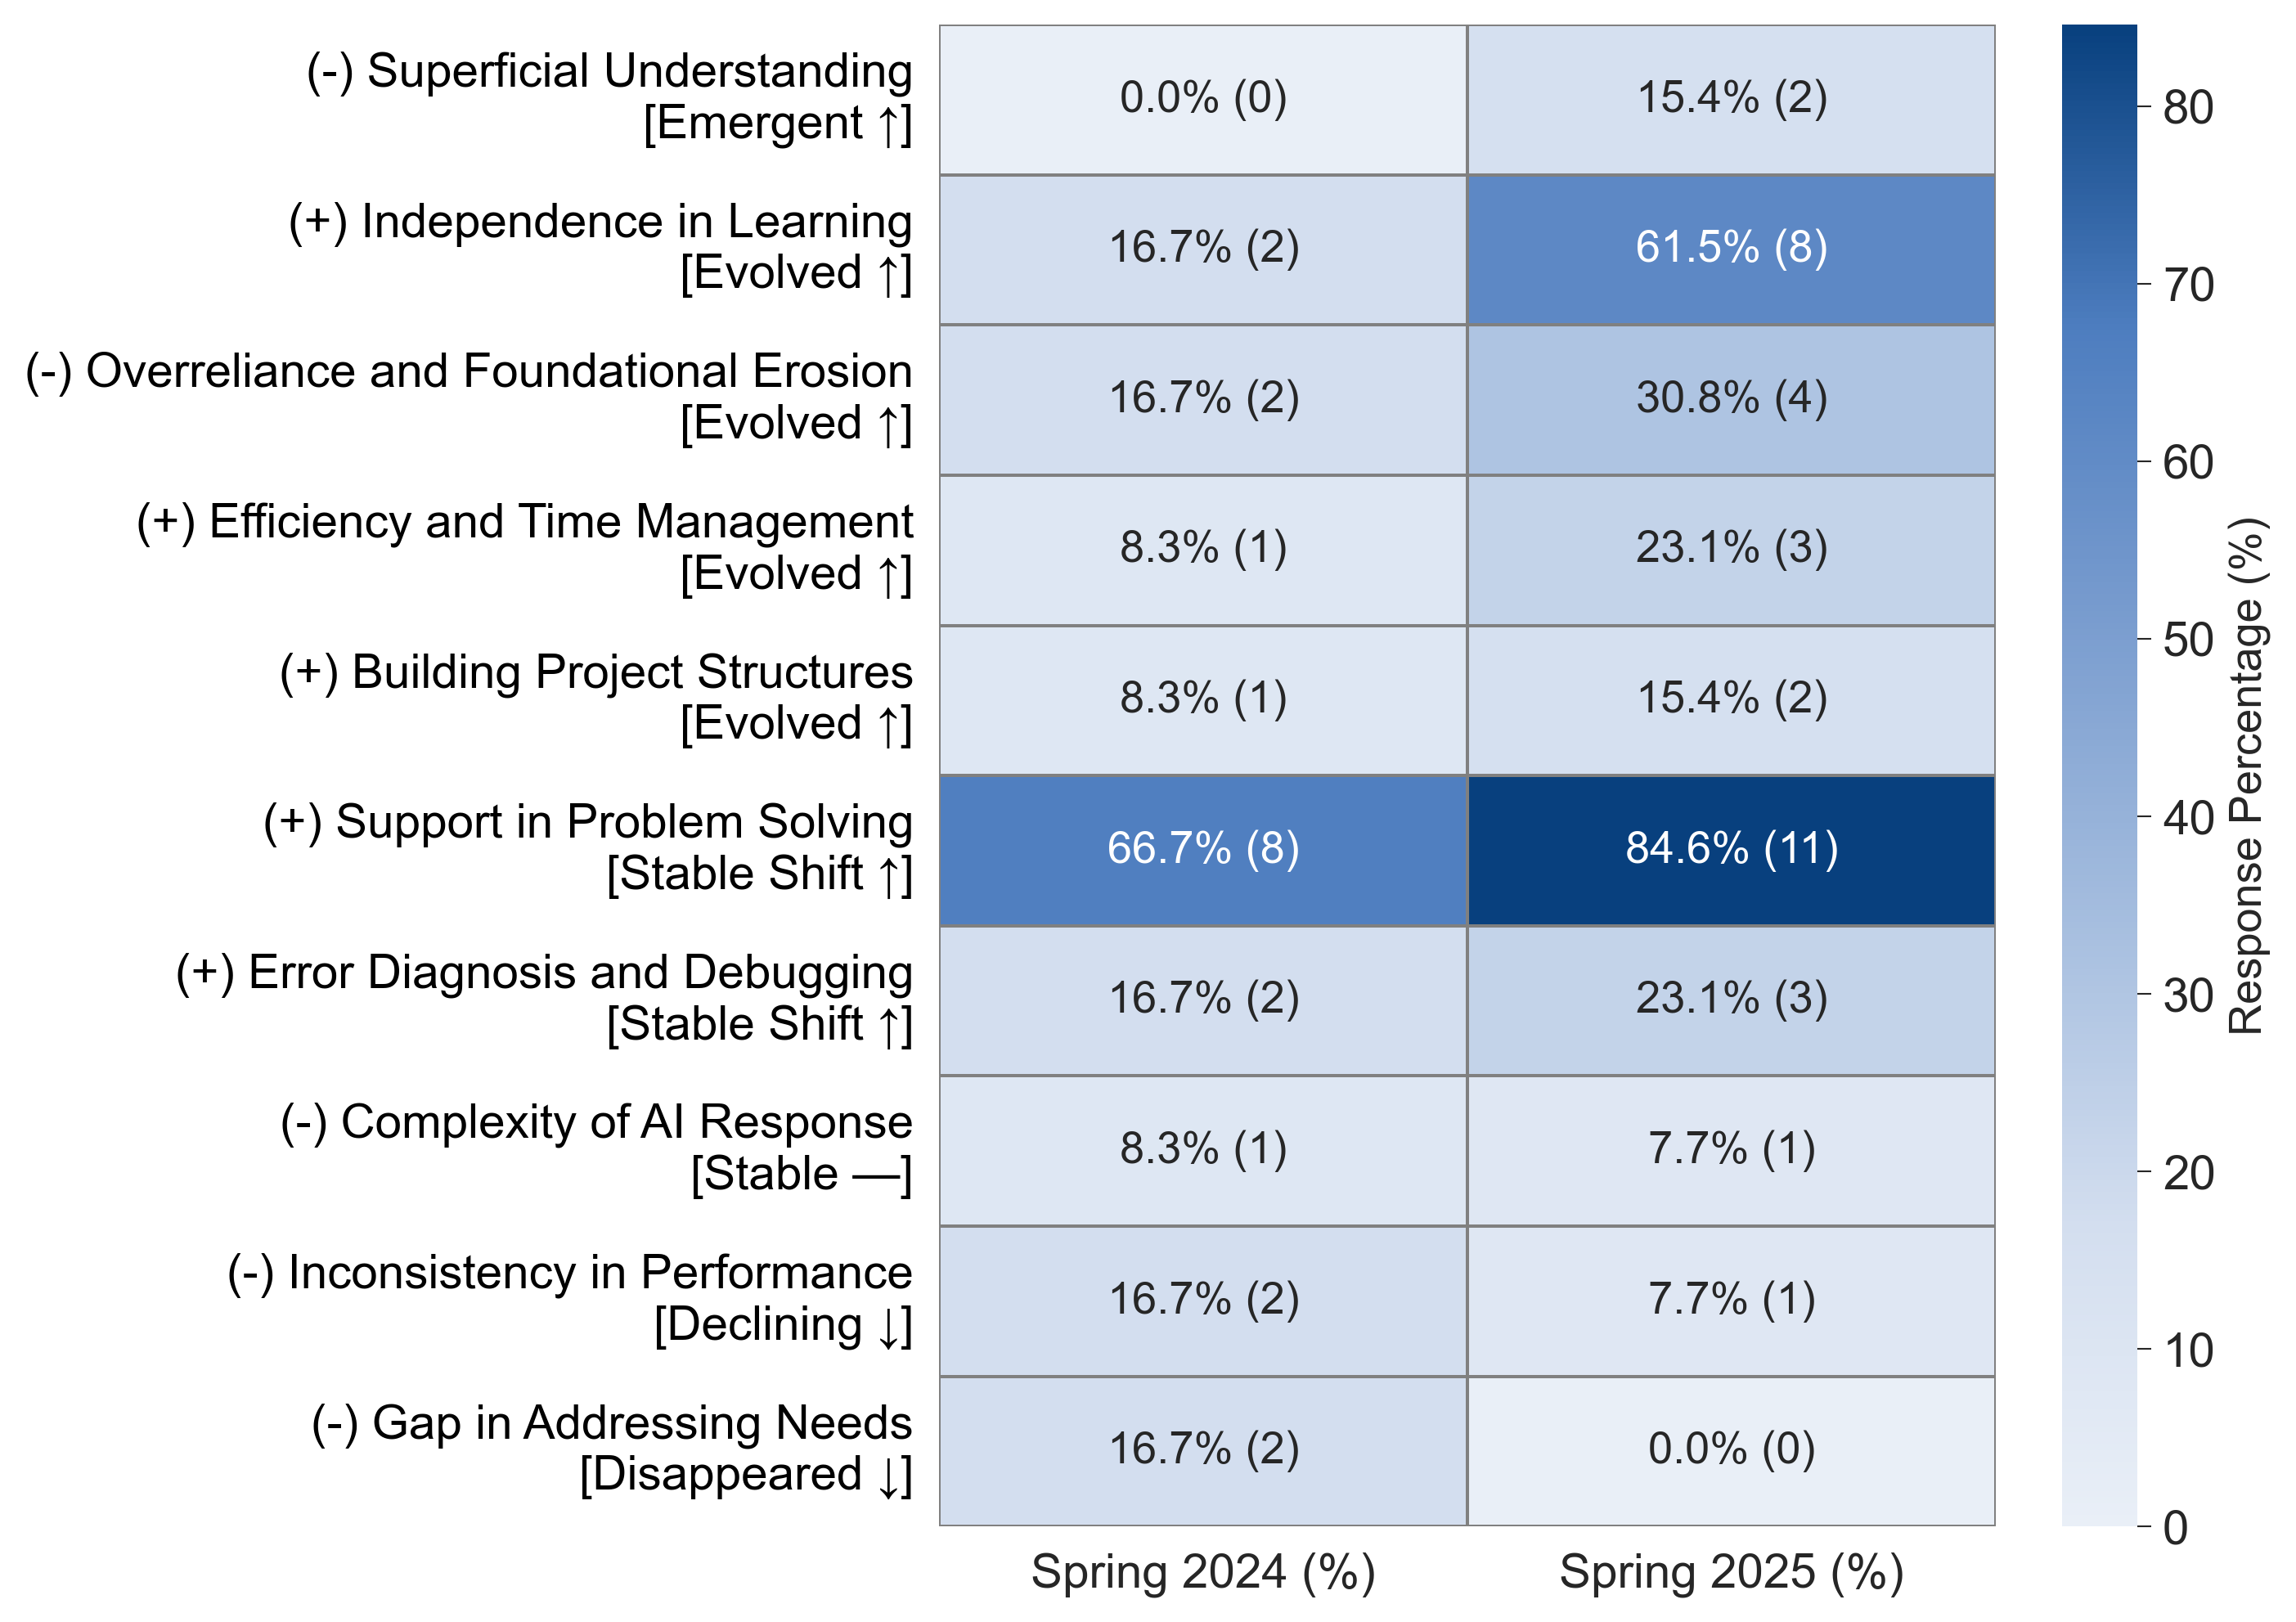

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors
import pandas as pd
import numpy as np

# ───────────────────────────────────────────────────────────────────────────────
#  ETH-Blue palette (from 10 % tint to 120 % shade)
# ───────────────────────────────────────────────────────────────────────────────
ETH_BLUE = {
    "10":  "#E9EFF7",
    "20":  "#D3DEEF",
    "40":  "#A6BEDF",
    "60":  "#7A9DCF",
    "80":  "#4D7DBF",
    "120": "#08407E",
}

# Positive / negative label colours
# POS_COLOR = ETH_BLUE["120"]     # darkest ETH-Blue
# NEG_COLOR = ETH_BLUE["80"]      # mid-tone ETH-Blue
POS_COLOR = '#365213'
POS_COLOR = 'black'
#NEG_COLOR= '#8C0A59'  #Purple
#NEG_COLOR= '#96272D' #Red
NEG_COLOR= 'black' #Red


# Custom ETH-Blue sequential colormap for the heat-map cells
eth_cmap = mcolors.LinearSegmentedColormap.from_list(
    "eth_blue_ramp",
    [ETH_BLUE[s] for s in ("10", "20", "40", "60", "80", "120")],
    N=256,
)

# ───────────────────────────────────────────────────────────────────────────────
#  Figure-wide typography (Nature-style + slight bump)
# ───────────────────────────────────────────────────────────────────────────────
ff = 5
plt.rcParams.update({
    "font.family": "sans-serif",
    "font.sans-serif": ["Arial", "Helvetica"],
    "font.size": 8 + ff,
    "axes.titlesize": 9 + ff,
    "axes.labelsize": 8 + ff,
    "xtick.labelsize": 8 + ff,
    "ytick.labelsize": 8 + ff,
    "legend.fontsize": 8 + ff,
    "figure.dpi": 300,
    "axes.linewidth": 0.5,
    "xtick.major.width": 0.5,
    "ytick.major.width": 0.5,
})

# ───────────────────────────────────────────────────────────────────────────────
#  Data
# ───────────────────────────────────────────────────────────────────────────────
themes_ordered = [
    "(-) Superficial Understanding",                       # Emergent (0, 2)
    "(+) Independence in Learning",                        # Evolved ↑ (2, 8)
    "(-) Overreliance and Foundational Erosion",           # Evolved ↑ (2, 4)
    "(+) Efficiency and Time Management",                  # Evolved ↑  (1, 3)
    "(+) Building Project Structures",                     # Evolved ↑  (1,2)
    "(+) Support in Problem Solving",                      # Stable Shift (8, 11)
    "(+) Error Diagnosis and Debugging",                   # Stable Shift (2, 3) 
    "(-) Complexity of AI Response",                       # Stable (1,1)
    "(-) Inconsistency in Performance",                    # Declining ↓ (2,1)
    "(-) Gap in Addressing Needs",                         # Disappeared ↓ (2,0)
]

# raw counts for each semester
count_2024 = np.array([0, 2, 2, 1, 1, 8,  2, 1, 2, 2])
count_2025 = np.array([2, 8, 4, 3, 2, 11, 3, 1, 1, 0])
n_2024, n_2025 = 12, 13

# convert to percentages
pct_2024 = np.round((count_2024 / n_2024) * 100, 1)
pct_2025 = np.round((count_2025 / n_2025) * 100, 1)

# evolution labels
change_labels = [
    "Emergent ↑", "Evolved ↑", "Evolved ↑", "Evolved ↑", "Evolved ↑", 
    "Stable Shift ↑", "Stable Shift ↑", "Stable —", "Declining ↓", "Disappeared ↓",
]

# polarity of themes (True = positive)
positive_theme = [
    False, False, True, True, True, True, True, False, False, False,
]

# annotation strings (percentage + raw count)
annot_data = np.empty((len(themes_ordered), 2), dtype=object)
for i in range(len(themes_ordered)):
    annot_data[i, 0] = f"{pct_2024[i]}% ({count_2024[i]})"
    annot_data[i, 1] = f"{pct_2025[i]}% ({count_2025[i]})"

# DataFrame for seaborn
df_pct = pd.DataFrame({
    "Spring 2024 (%)": pct_2024,
    "Spring 2025 (%)": pct_2025,
}, index=themes_ordered)

# ───────────────────────────────────────────────────────────────────────────────
#  Plot
# ───────────────────────────────────────────────────────────────────────────────
fig, ax = plt.subplots(figsize=(9.5, 6.8))

sns.heatmap(
    df_pct,
    annot=annot_data,
    fmt="",
    cmap=eth_cmap,                 # ← ETH-Blue ramp
    linewidths=0.5,
    linecolor="gray",
    cbar_kws={"label": "Response Percentage (%)"},
    ax=ax,
)

# Adjust the ticks font size
colorbar = ax.collections[0].colorbar
colorbar.ax.tick_params(labelsize=14)  

# build composite y-tick labels (theme + change label)
ytick_labels = [
    f"{theme}\n[{change}]"
    for theme, change in zip(themes_ordered, change_labels)
]

ax.set_yticklabels(ytick_labels, rotation=0, fontsize=9+ff)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=9+ff)

# Align y-tick labels to the right
for label in ax.get_yticklabels():
    label.set_horizontalalignment('right')


# colour y-tick labels by polarity
for label, is_pos in zip(ax.get_yticklabels(), positive_theme):
    label.set_color(POS_COLOR if is_pos else NEG_COLOR)

plt.tight_layout()
plt.savefig("figures/Fig07_Theme_Evolution_Heatmap.png", format="png")
plt.show()


### 4.5 Project gains with stable foundational knowledge

Total-grade comparison table (all projects, converted to a 0–100 % scale)

| Year          | Project (short title)                       | Total grade % |
| ------------- | ------------------------------------------- | ------------- |
| 2024      | Estero Bay surficial-aquifer model          | 75            |
|               | Darwin-Core export automation               | 79            |
|               | Loggerhead-turtle proteomics                | 82            |
|               | *K. brevis* ML prediction (Fletcher team)   | 66            |
|               | Sanibel Slough nutrient seasonality         | 75            |
|               | Upwelling–*K. brevis* linkage               | 69            |
|               | Hurricanes vs. salinity                     | 64            |
| 2024 mean |                                             | 72.9      |
| 2025      | Hempleman groundwater contaminant transport | 80.5          |
|               | REMapp red-tide prediction (Baker et al.)   | 89.0          |
|               | Lake Okeechobee HABs (Hewitt & Grabovac)    | 90.0          |
|               | Down-scaled precipitation (Trainor et al.)  | 79.0          |
|               | COVID-19 lockdown & coral reefs             | 71.0          |
| 2025 mean |                                             | 81.9      |




*Average cohort performance rose from ≈73 % in 2024 to ≈82 % in 2025, reflecting stronger reproducibility and methodological depth in the later year.*


| Cohort   | n | Mean ± SD    |
| -------- | - | ------------ |
| 2024 | 7 | 72.9 ± 6.2 % |
| 2025 | 5 | 81.9 ± 7.8 % |

Welch’s two-sample t-test

* t = 2.09
* p = 0.071

#### Interpretation

* The p-value of ≈ 0.07 is *just above* the conventional 0.05 threshold, so the difference is not statistically significant at the 5 % level, but it does approach significance (often called “marginally significant”).
* Practically, the 2025 cohort scored about 9 percentage points higher on average, with a moderate effect size (Cohen’s d ≈ 1.2). A slightly larger sample—or a non-parametric test with the same result—might push the p-value below 0.05.

The box plot above visualises the shift: 2025’s median and upper quartile rise relative to 2024, but overlap in the lower tails keeps the statistical evidence just shy of the conventional cutoff.


#### Corrected exam analysis

| Cohorts       | n  | Mean ± SD    | Welch t | p-value |
| ------------- | -- | ------------ | ------- | ------- |
| 2024 exam | 12 | 65.3 ± 9.0 % |         |         |
| 2025 exam | 13 | 64.8 ± 8.4 % | –0.73   | 0.47    |

* The updated p-value (≈ 0.47) remains well above 0.05, confirming no significant difference between cohorts on the final exam.
* The project-grade gap (2025 > 2024) is unchanged (p ≈ 0.07).
* The box-plot figure now visualises both project and corrected exam distributions side-by-side for 2024 and 2025 (see chart above).



A robust scale test is any statistical procedure that asks whether two (or more) populations have the same dispersion (variance, spread, scale) while *down-weighting the influence of outliers and relaxing the assumption of normality*.  In practice, “robust” usually means that the test statistic is built from a robust estimator of scale such as the median, the inter-quartile range (IQR), the median absolute deviation (MAD), or a trimmed mean, instead of the usual mean–square deviations that underlie the classical $F$-test or Bartlett’s test.

#### Take-aways

* Robust scale tests (Brown–Forsythe, trimmed-mean Levene, Fligner–Killeen, permutation on MAD/IQR) let you compare spreads when normal-theory tests are unreliable.
* The version you already called (`center='median'`) is generally recommended for small or skewed samples and is widely accepted in applied research.
* If the box-plot’s IQRs look different but the robust test is non-significant, the likely explanation is that the tails in the “narrower” group compensate in the variance calculation.  A robust scale test confirms that intuition in a formal way.





--- T-test for Means ---
P-value for difference in project means: 0.0000
P-value for difference in exam means: 0.4741

--- Mann-Whitney U test for Medians ---
P-value for difference in project medians: 0.0004
P-value for difference in exam medians: 0.6426

--- Summary Statistics ---

Project 2024:
  Mean:   69.92
  Std Dev:6.27
  Median: 67.50

Project 2025:
  Mean:   83.11
  Std Dev:6.99
  Median: 84.75

Exam 2024:
  Mean:   66.81
  Std Dev:9.33
  Median: 65.84

Exam 2025:
  Mean:   64.10
  Std Dev:9.22
  Median: 65.00


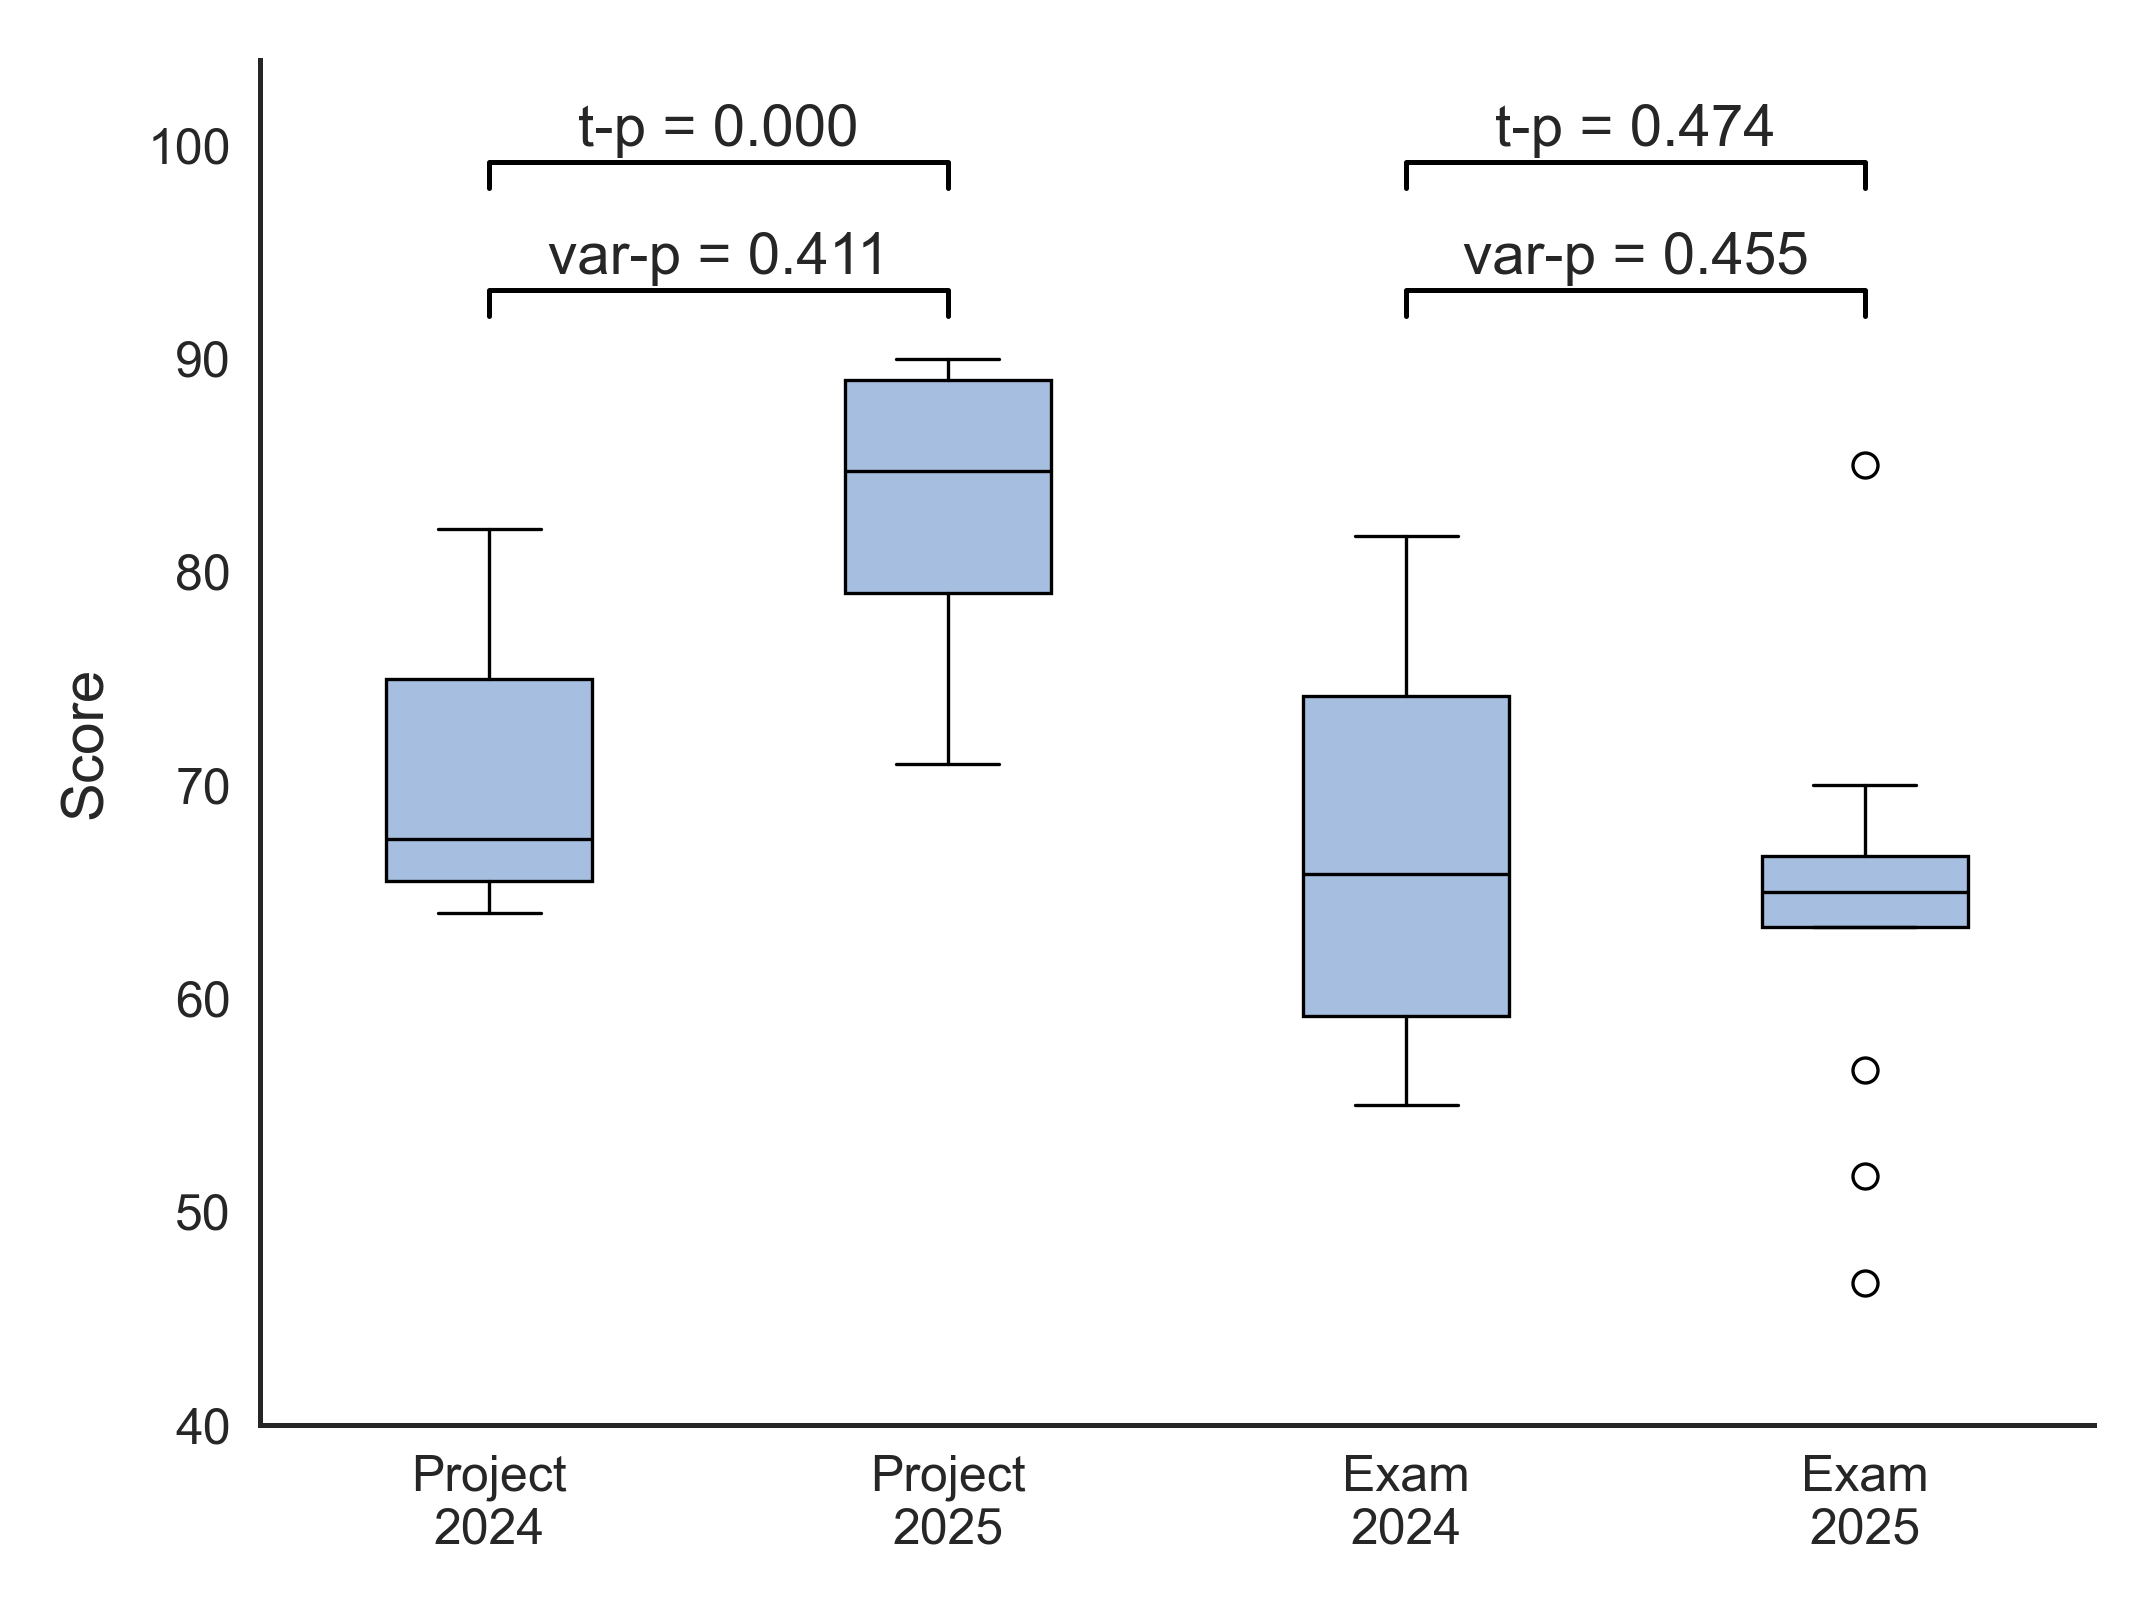

In [8]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.stats import ttest_ind, levene, mannwhitneyu  # MODIFIED: Added mannwhitneyu

# ───────────────────────────────────────────
ff=-1
# Hi-res figure defaults (Nature-ish)
mpl.rcParams['figure.dpi']      = 600
mpl.rcParams['savefig.dpi']     = 600
mpl.rcParams['font.family']     = 'sans-serif'
mpl.rcParams['font.sans-serif'] =  ["Arial", "Helvetica"]
mpl.rcParams['axes.spines.top']   = False
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.linewidth']    = 0.6
mpl.rcParams['xtick.direction']   = 'in'
mpl.rcParams['ytick.direction']   = 'in'
mpl.rcParams['xtick.major.size']  = 4
mpl.rcParams['ytick.major.size']  = 4
mpl.rcParams['xtick.labelsize']   = 7+ff
mpl.rcParams['ytick.labelsize']   = 7+ff
mpl.rcParams['axes.labelsize']    = 8+ff
mpl.rcParams['axes.titlesize']    = 9+ff

# ───────────────────────────────────────────
# Data
grades_2024_project = [75, 79, 82, 66, 66, 66, 75, 69, 69, 64, 64, 64]
grades_2025_project = [80.5, 89.0, 89.0, 89.0, 89.0, 89.0, 90.0, 90.0,
                       79.0, 79.0, 79.0, 79.0, 71.0, 71.0]

grades_2024_exam = [56.67, 66.67, 56.67, 73.33, 61.67, 76.67,
                    60.00, 55.00, 65.00, 81.67, 80.00, 68.33]
grades_2025_exam = [68.33, 65.00, 56.67, 63.33, 85.00, 66.67,
                    46.67, 51.67, 65.00, 70.00, 66.67, 65.00, 63.33]

# ETH-blue colour (single shade for boxes)
eth_blue = "#A6BEDF"      # 40 % tint

data        = [grades_2024_project, grades_2025_project,
               grades_2024_exam,   grades_2025_exam]
labels      = ['Project\n2024', 'Project\n2025',
               'Exam\n2024',    'Exam\n2025']
box_colors = [eth_blue] * 4  # same shade for all

fig, ax = plt.subplots(figsize=(3.15*1.2, 2.4*1.2))   # ≈ 8 cm width

# Outlier styling
flier_props = dict(marker='o', markersize=3, markeredgewidth=0.4)

bp = ax.boxplot(
    data,
    tick_labels=labels,
    patch_artist=True,
    medianprops=dict(color='black', linewidth=0.4),
    whiskerprops=dict(linewidth=0.4),
    capprops=dict(linewidth=0.4),
    flierprops=flier_props
)

# Apply face colours
for patch, color in zip(bp['boxes'], box_colors):
    patch.set_facecolor(color)
    patch.set_linewidth(0.4)
    patch.set_edgecolor('black')

# ───────────────────────────────────────────
# Statistics

# Welch t-tests (mean difference)
t_proj,  p_proj  = ttest_ind(grades_2025_project, grades_2024_project,
                             equal_var=False)
t_exam,  p_exam  = ttest_ind(grades_2025_exam,   grades_2024_exam,
                             equal_var=False)

# Levene tests (variance equality) – centre='median' is more robust
v_proj,  p_var_proj = levene(grades_2025_project, grades_2024_project,
                             center='median')
v_exam,  p_var_exam = levene(grades_2025_exam,   grades_2024_exam,
                             center='median')

# --- NEW: Mann-Whitney U tests (for median difference) ---
u_proj, p_median_proj = mannwhitneyu(grades_2024_project, grades_2025_project, alternative='two-sided')
u_exam, p_median_exam = mannwhitneyu(grades_2024_exam, grades_2025_exam, alternative='two-sided')


# --- NEW: Print results for clarity ---
print("--- T-test for Means ---")
print(f"P-value for difference in project means: {p_proj:.4f}")
print(f"P-value for difference in exam means: {p_exam:.4f}\n")

print("--- Mann-Whitney U test for Medians ---")
print(f"P-value for difference in project medians: {p_median_proj:.4f}")
print(f"P-value for difference in exam medians: {p_median_exam:.4f}\n")


# ───────────────────────────────────────────
# Annotation helper
def annotate_p(ax, x1, x2, y, p_val, label='p'):
    """Draw a bracket between x1 and x2 at height y and write p-value."""
    ax.plot([x1, x1, x2, x2], [y, y+1.2, y+1.2, y],
            lw=0.6, color='black')
    ax.text((x1+x2)/2, y+1.4, f'{label} = {p_val:.3f}',
            ha='center', va='bottom', fontsize=7)

# Draw t-test p-values just above the boxes
annotate_p(ax, 1, 2, 98, p_proj,  label='t-p')
annotate_p(ax, 3, 4, 98, p_exam,  label='t-p')

# Draw variance p-values a little higher
annotate_p(ax, 1, 2, 92, p_var_proj, label='var-p')
annotate_p(ax, 3, 4, 92, p_var_exam, label='var-p')

# Dictionary to hold all datasets for easy processing
all_grades = {
    "Project 2024": grades_2024_project,
    "Project 2025": grades_2025_project,
    "Exam 2024": grades_2024_exam,
    "Exam 2025": grades_2025_exam
}

# Loop through each dataset, calculate stats, and print the results
print("--- Summary Statistics ---")
for name, data in all_grades.items():
    mean_score = np.mean(data)
    std_dev = np.std(data, ddof=1)  # Using ddof=1 for sample standard deviation
    median_score = np.median(data)
    
    print(f"\n{name}:")
    print(f"  Mean:   {mean_score:.2f}")
    print(f"  Std Dev:{std_dev:.2f}")
    print(f"  Median: {median_score:.2f}")



# ───────────────────────────────────────────
# Axis styling
ax.set_ylabel('Score')
ax.set_ylim(40, 104)         # head-room for brackets
# ax.set_title('Student Performance: Projects vs Exams (2024–2025)')

plt.tight_layout()
fig.savefig("figures/Fig08_Student_Performance_boxplot.png",
            dpi=600, bbox_inches="tight")
plt.show()

## 7. Societal implications: Higher education in the AI era

This is the philosophical and conceptual heart of your project, and it’s very wise to define it clearly before rewriting the proposal.

You are essentially proposing to develop a taxonomy of forms and levels of human-machine co-generation of knowledge.
This will become the *central analytical lens* of your research and interviews.

Let’s carefully explore this together, grounded in philosophy of science, STS, and AI studies.

---

1. What do we mean by “co-generation of knowledge”?

You are drawing a critical distinction:

* Not just humans using AI as a tool (simple automation or augmentation)
* But cases where both human and machine contribute meaningfully to the discovery process, in ways that are:

  * Epistemically non-trivial
  * Interdependent
  * Iterative (feedback loops between human & machine)

This makes your concept much richer than “collaboration” (too vague).

It aligns with emerging ideas of hybrid epistemic agency:

* See: Shannon Vallor (2016) *Technology and the Virtues*
* See: Latour’s Actor-Network Theory (1987) → machines as “actants” in knowledge creation

This is very current + theoretically exciting for NSF SoS\:DCI.

---

 2. Proposed Framework: Levels of Co-Generation

I suggest thinking of levels as a spectrum of epistemic involvement, from lowest to highest:

| Level | Name                                      | Description                                                                                            | Example                                                                       |
| ----- | ----------------------------------------- | ------------------------------------------------------------------------------------------------------ | ----------------------------------------------------------------------------- |
| 0     | Tool Use (No Co-Generation)           | Human uses AI passively as a calculator, data organizer, or summarizer                                 | Spreadsheet modeling; AI transcription                                        |
| 1     | Augmentation                          | AI supports human reasoning but does not independently propose knowledge claims                        | Data mining suggestions; pattern recognition for human interpretation         |
| 2     | Assisted Hypothesis Generation        | AI proposes possible hypotheses or correlations; human decides what is valid or worth pursuing         | Drug discovery algorithms suggesting molecular targets                        |
| 3     | Co-Interpretation                     | AI identifies patterns AND human + machine jointly interpret significance; iterative process           | AI-driven materials science discovering unexpected material combinations      |
| 4     | Co-Design                             | Human & machine both contribute to shaping experimental design or research pathways                    | Human sets parameters, AI generates optimized experimental designs            |
| 5     | Autonomous Discovery (High Co-Agency) | AI independently identifies novel knowledge claims validated post-hoc by human researchers             | AlphaFold predicting protein structures; DeepMind's AI in materials discovery |
| 6     | Speculative (Theoretical Only)        | Fully autonomous science agents that design, run, and interpret experiments without human intervention | Currently no confirmed real-world example                                     |

This is exactly the kind of framework SoS\:DCI reviewers will find valuable.

You can frame your interviews + analysis around:

* What level(s) are being practiced in this field?
* How do different researchers conceptualize their relationship with the AI system?
* Does the level vary by institution, discipline, or research culture?

This becomes your central typology of co-generation practices.

---

 3. Forms of Co-Generation

You can also categorize types of co-generation, which often cross levels:

| Form                           | Example                                                                          |
| ------------------------------ | -------------------------------------------------------------------------------- |
| Data-Driven Co-Generation  | Pattern detection, anomaly spotting (e.g. climate data modeling)                 |
| Design Co-Generation       | Generating experimental designs (e.g. chemistry synthesis pathways)              |
| Simulation Co-Generation   | Joint exploration of model behavior (e.g. physics, economics)                    |
| Writing Co-Generation      | AI drafting text that humans revise (e.g. scientific abstracts, grant proposals) |
| Interpretive Co-Generation | AI proposes explanations; human assesses validity (e.g. gene network analysis)   |

You can let your interview data fill in additional forms.

---

Conclusion: Your Project Becomes

> "This project seeks to map emerging levels and forms of human-machine co-generation of scientific knowledge across disciplines, institutions, and research cultures, and to analyze how these practices interact with classical models of scientific discovery and knowledge validation."


